# Airline Passenger Satisfaction

In [11]:
# Importando bibliotecas
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import warnings
from pprint import PrettyPrinter
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import chi2_contingency
import plot_likert

warnings.filterwarnings('ignore')

In [69]:
# Leitura do df
df1 = pd.read_csv('test.csv')
df2 = pd.read_csv('train.csv')

df1.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [70]:
# Visualizando o df
df2.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
id,70172,5047,110028,24026,119299
Gender,Male,Male,Female,Female,Male
Customer Type,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer,Loyal Customer
Age,13,25,26,25,61
Type of Travel,Personal Travel,Business travel,Business travel,Business travel,Business travel
Class,Eco Plus,Business,Business,Business,Business
Flight Distance,460,235,1142,562,214
Inflight wifi service,3,3,2,2,3
Departure/Arrival time convenient,4,2,2,5,3


In [71]:
# Concatenando o treino e teste
df = pd.concat([df1, df2])

In [72]:
# Info do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      129880 no

In [73]:
# Verificando as colunas
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [74]:
# Dropando o index
df = df.drop('Unnamed: 0', axis = 1)

In [75]:
# Verificando dados duplicados
duplicated = df.duplicated()
number_duplicated = duplicated.sum()

print(number_duplicated)

0


In [76]:
# Renomeando as colunas
df.rename(columns={column: column.lower().replace(" ", "_").replace("/", "_").replace("-", "_") for column in df.columns}, inplace=True)
df.rename(columns={"checkin_service": "check_in_service"}, inplace=True)
df.columns

Index(['id', 'gender', 'customer_type', 'age', 'type_of_travel', 'class',
       'flight_distance', 'inflight_wifi_service',
       'departure_arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'on_board_service', 'leg_room_service',
       'baggage_handling', 'check_in_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'satisfaction'],
      dtype='object')

In [77]:
# Checando valores Nan

df.isna().sum()[df.isna().sum() > 0]

arrival_delay_in_minutes    393
dtype: int64

In [79]:
# Tratando valores vazios da coluna arrival_delay_in_minutes
df['arrival_delay_in_minutes'].fillna(0, inplace=True)

# Convertendo a coluna para o tipo de dados int
df['arrival_delay_in_minutes'] = df['arrival_delay_in_minutes'].astype(int)

In [80]:
# Atraso no pouso em minutos
arrival_delay_in_minutes = pd.DataFrame(df['arrival_delay_in_minutes'].value_counts()).reset_index()
arrival_delay_in_minutes.columns = ['arrival_delay_in_minutes', 'count']


## Exploratory Data Analysis

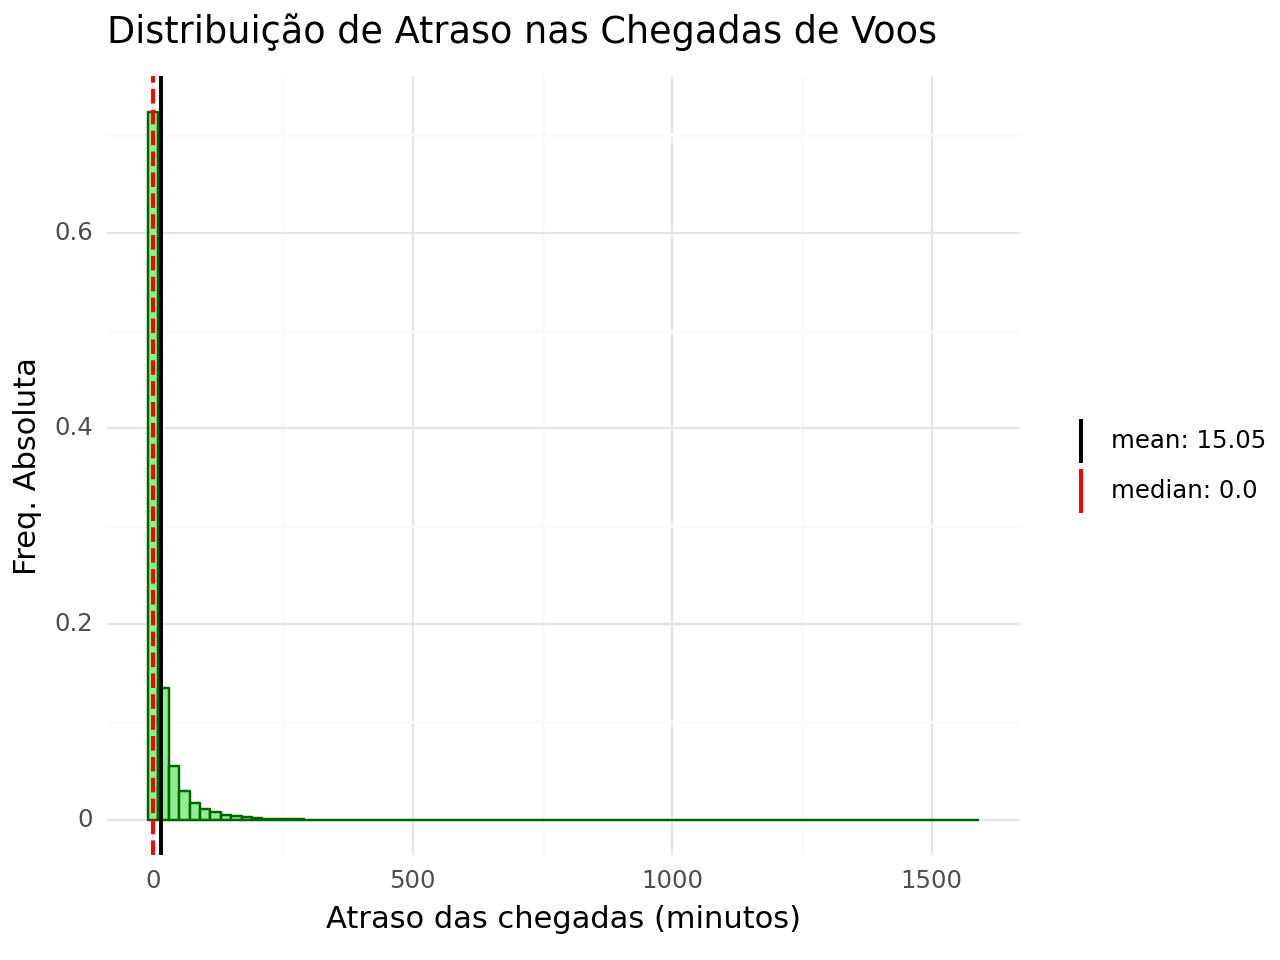

In [82]:
g = (
    ggplot()
    + geom_histogram(
        data=df,
        mapping=aes(x='arrival_delay_in_minutes', y=after_stat('count/np.sum(count)')),
        binwidth=20,
        color='darkgreen',
        fill='lightgreen'
    )
    + theme_minimal()
    + labs(
        x='Atraso das chegadas (minutos)',
        y='Freq. Absoluta'
    )
    + ggtitle('Distribuição de Atraso nas Chegadas de Voos')
    + geom_vline(data=pd.DataFrame({'mean': np.mean(df.arrival_delay_in_minutes.dropna()), 'median': np.median(df.arrival_delay_in_minutes.dropna())}, index=range(2)), 
                 mapping=aes(xintercept='median', color='factor(median)'), linetype='dashed', size=.8)
    + geom_vline(data=pd.DataFrame({'mean': np.mean(df.arrival_delay_in_minutes.dropna()), 'median': np.median(df.arrival_delay_in_minutes.dropna())}, index=range(2)), 
                 mapping=aes(xintercept='mean', color='factor(mean)'), linetype='solid', size=.8)
    + scale_color_manual(values={np.median(df.arrival_delay_in_minutes.dropna()): 'red', np.mean(df.arrival_delay_in_minutes.dropna()): 'black'}, 
                         labels=[f'mean: {round(np.mean(df.arrival_delay_in_minutes.dropna()), 2)}', f'median: {np.median(df.arrival_delay_in_minutes.dropna())}'])
    + theme(legend_title=element_blank())
)
print(g)


No gráfico acima, vemos forte assimetria à direita. Posteriormente iremos substituir os valores NaN da *feature* `arrival_delay_in_minutes` pela mediana.

In [81]:
# Selecionando colunas com tipos de dados categóricos do DataFrame 'df' 
categoricos = df[list(df.select_dtypes(include='object').columns)[:-1]]
categoricos.head(3)

,gender,customer_type,type_of_travel,class
0,Female,Loyal Customer,Business travel,Eco
1,Female,Loyal Customer,Business travel,Business
2,Male,disloyal Customer,Business travel,Eco


In [83]:
def plot_count_bar(df, x_bar:str, rel_freq:bool, labels:dict):
    g = (
    ggplot(data=df)
    +geom_bar(
        aes(x=x_bar, 
            y='..count../sum(..count..)*100' if rel_freq == True else '..count..', 
            color=x_bar, 
            fill=x_bar)
    )
    +labs(**labels)
    +theme(
        legend_title=element_blank()
    )
    +theme_minimal()
    +theme(
        legend_title=element_blank()
    )
)
    print(g)

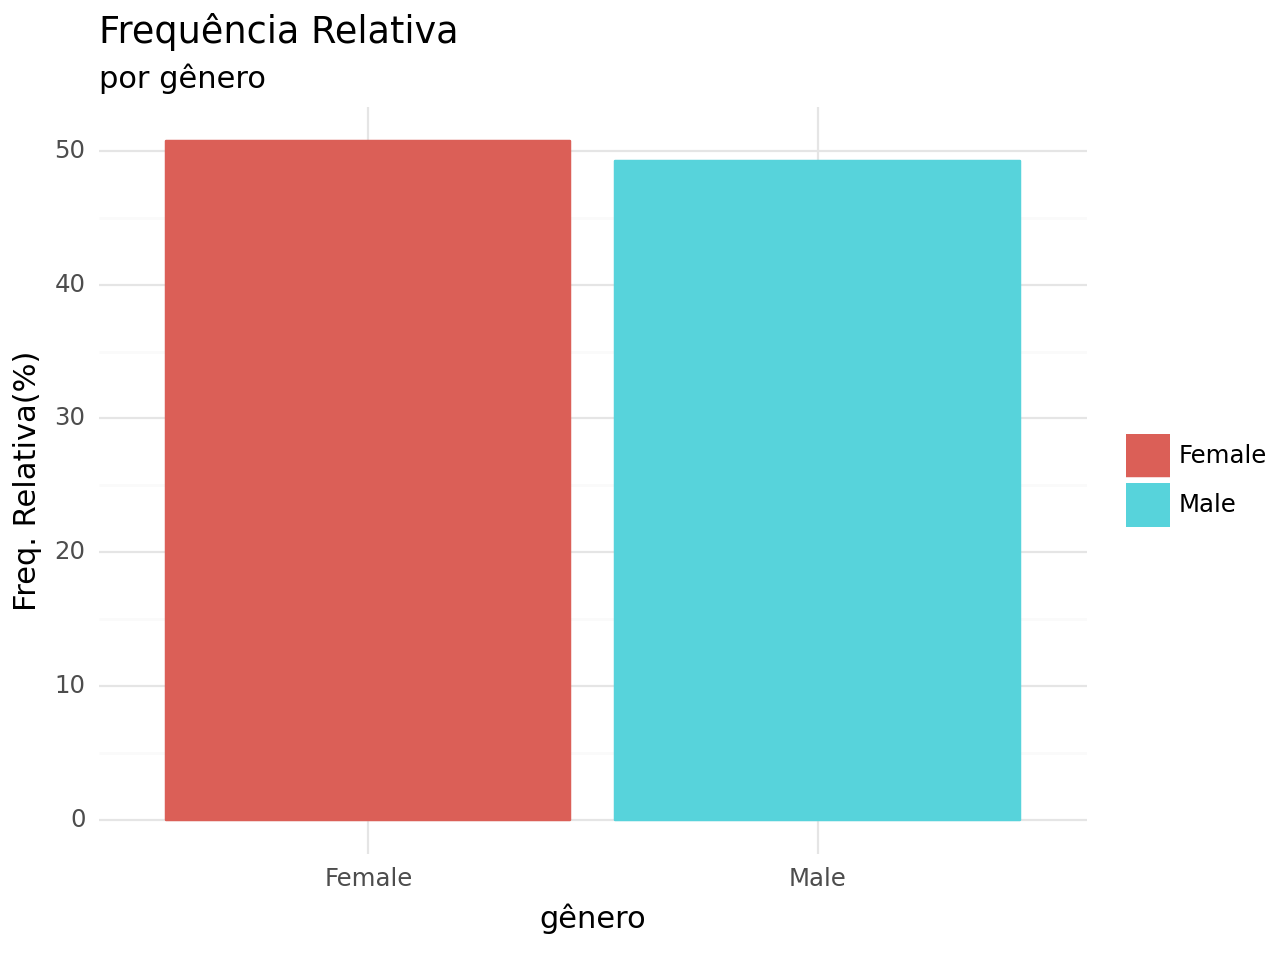

In [84]:
plot_count_bar(
    df,
    x_bar='gender',
    rel_freq=True,
    labels={'x':'gênero', 
            'y':'Freq. Relativa(%)', 
            'title': 'Frequência Relativa',
            'subtitle': 'por gênero'}
)

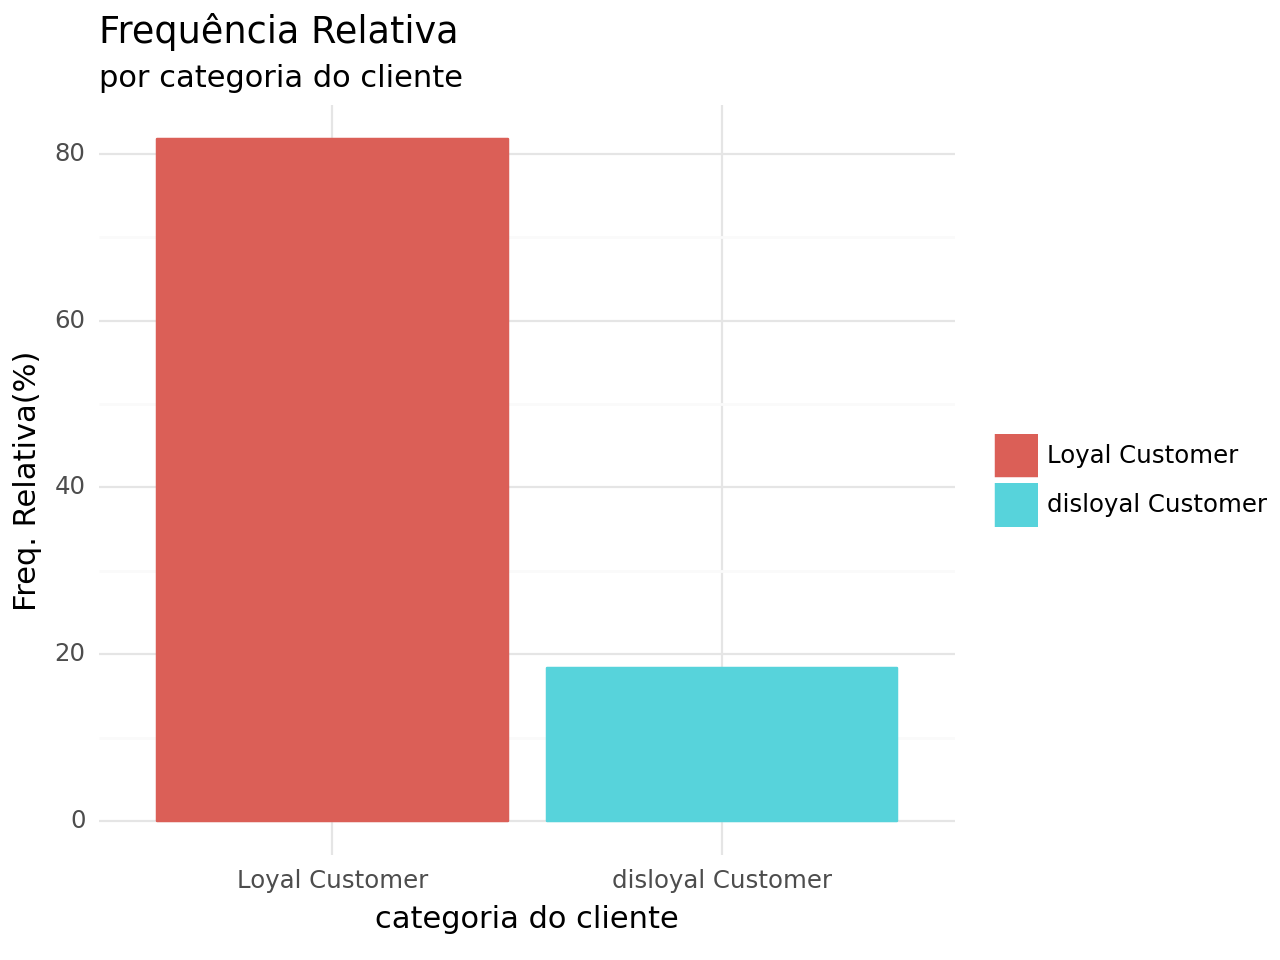

In [18]:
plot_count_bar(
    df,
    x_bar='customer_type',
    rel_freq=True,
    labels={
        'x': 'categoria do cliente',
        'y': 'Freq. Relativa(%)',
        'title': 'Frequência Relativa',
        'subtitle': 'por categoria do cliente'
    }
)

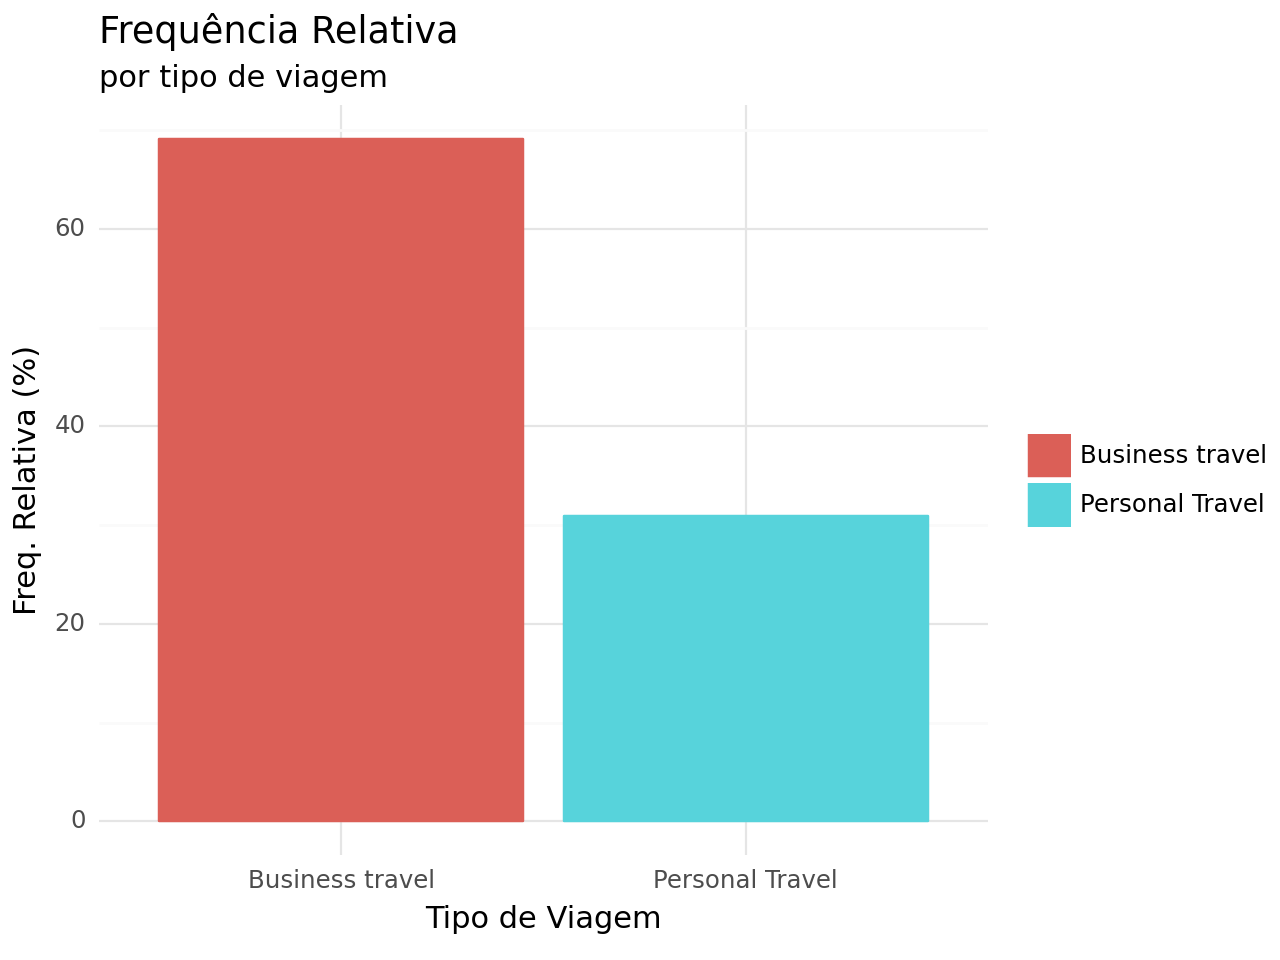

In [59]:
plot_count_bar(
    df,
    x_bar='type_of_travel',
    rel_freq=True,
    labels={
        'x': 'Tipo de Viagem',
        'y': 'Freq. Relativa (%)',
        'title': 'Frequência Relativa',
        'subtitle': 'por tipo de viagem'
    }
)

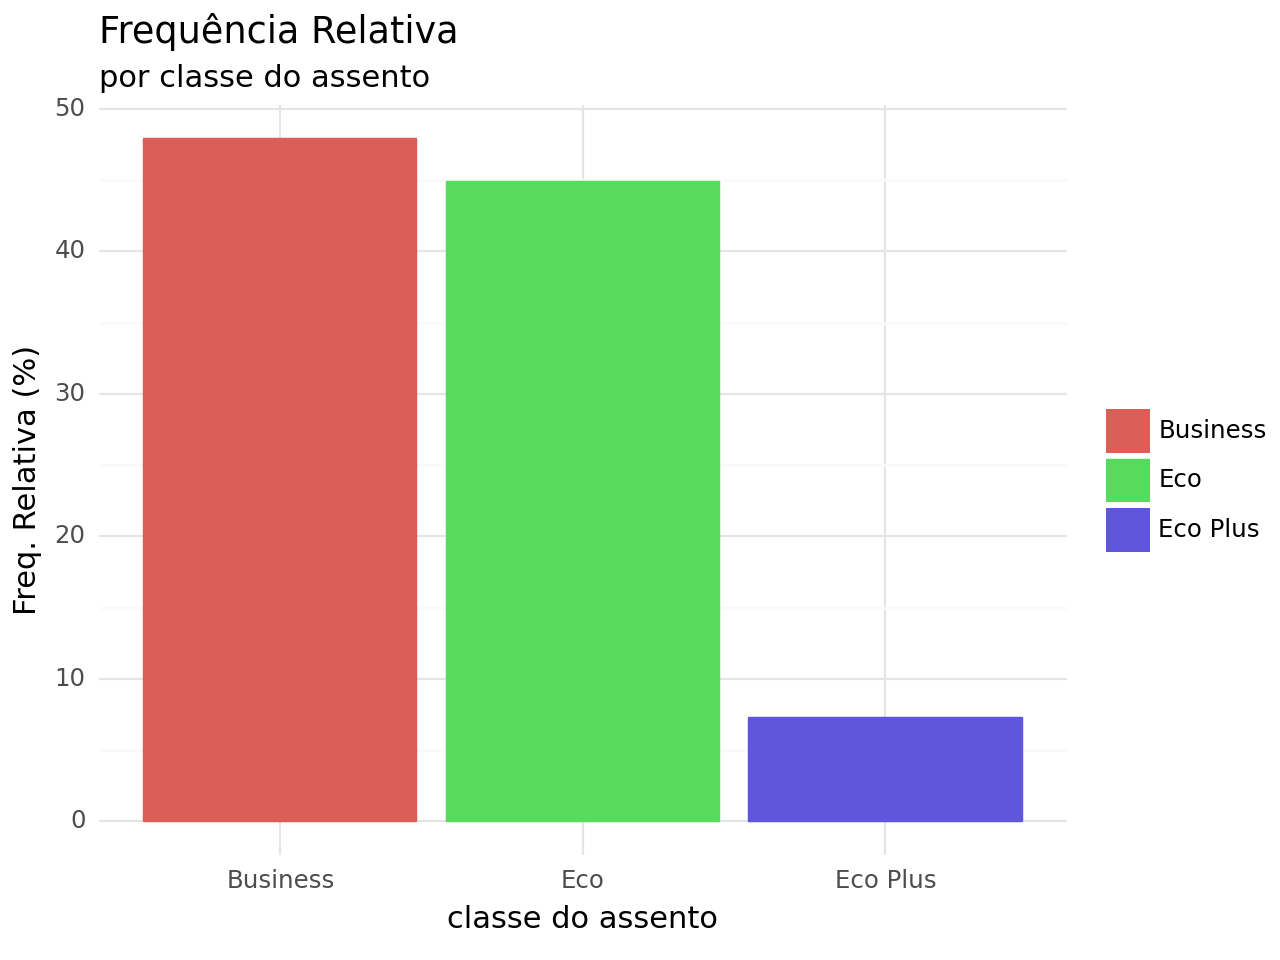

In [60]:
plot_count_bar(
    df,
    x_bar='class',
    rel_freq=True,
    labels={
        'x':'classe do assento',
        'y': 'Freq. Relativa (%)',
        'title': 'Frequência Relativa',
        'subtitle': 'por classe do assento'
    }
)

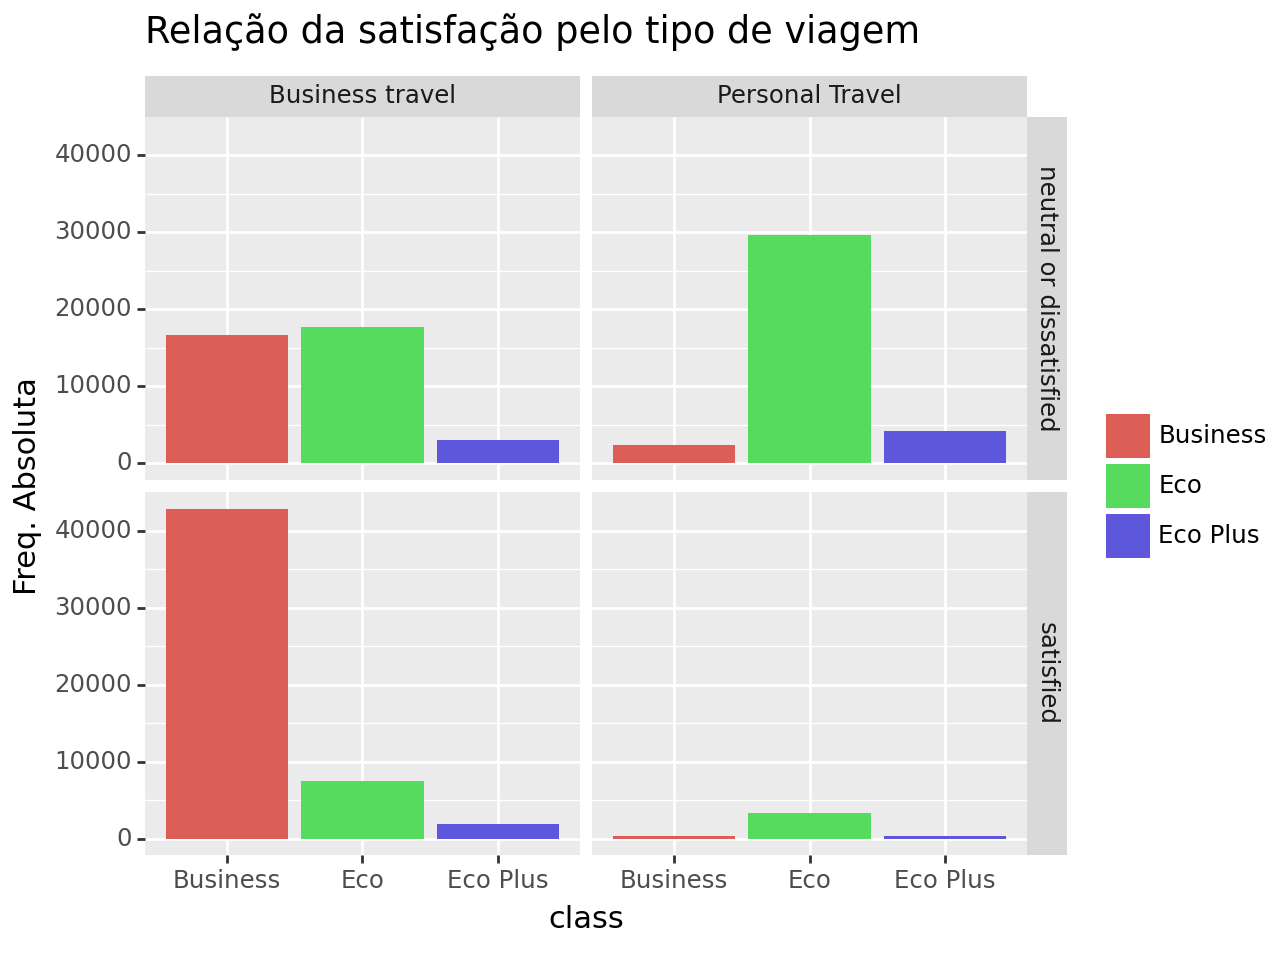

In [61]:
g = (
    ggplot(data=df)
    + geom_bar(
        aes(x='class',
            y='..count..',
            fill='class'
        )
    )
    + facet_grid('satisfaction ~ type_of_travel')
    + theme(legend_title=element_blank())
    + labs(
        y='Freq. Absoluta',
        title='Relação da satisfação pelo tipo de viagem'
    )
)
print(g)

Vemos que as pessoas que viajam a negócios e na classe executiva estão em sua maioria satisfeitas. Já o maior grupo de pessoas insatisfeitas é aquele que viaja por razões pessoais e na classe econômica.

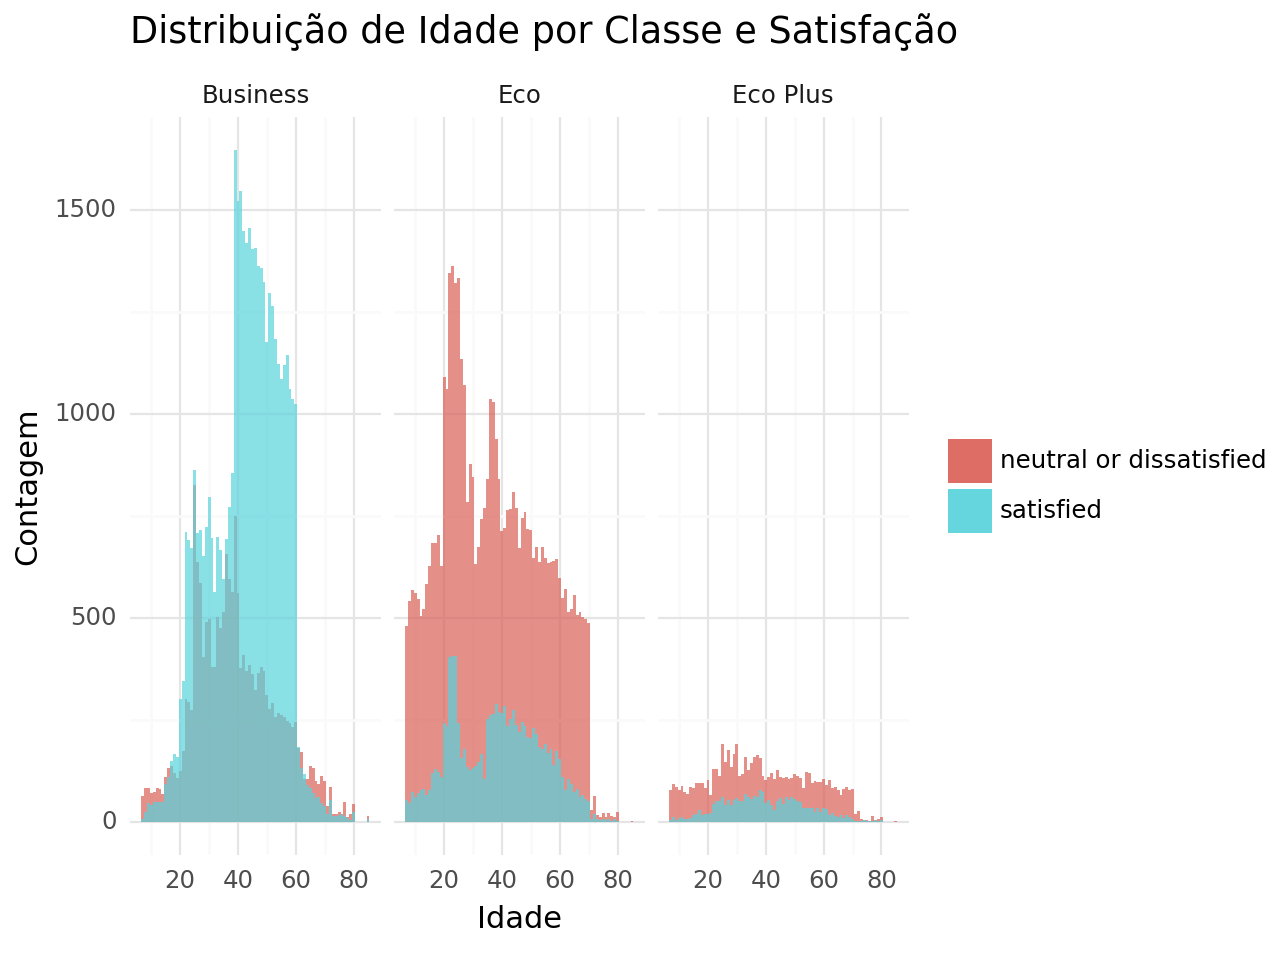

In [62]:
g = (
    ggplot(data=df)
    + geom_histogram(
        aes(x='age', fill='satisfaction'),
        df[df['satisfaction'] == 'neutral or dissatisfied'],
        binwidth=1,
        alpha=.7
    )
    + geom_histogram(
        aes(x='age', fill='satisfaction'),
        df[df['satisfaction'] == 'satisfied'],
        binwidth=1,
        alpha=.7
    )
    + facet_grid('. ~ class')
    + theme_minimal()
    + theme(legend_title=element_blank())
    + labs(
        title='Distribuição de Idade por Classe e Satisfação',
        x='Idade',
        y='Contagem'
    )
)
print(g)

Entre 20 e 25 anos e entre 40 a 60 anos, temos maior frequência de clientes satisfeitos. Uma hipótese é que esse é o grupo que mais viaja a negócios devido ao momento da carreira. Como vimos acima, a maior frequência de clientes satisfeitos ocorre com aqueles que viajam a negócios e na classe executiva.

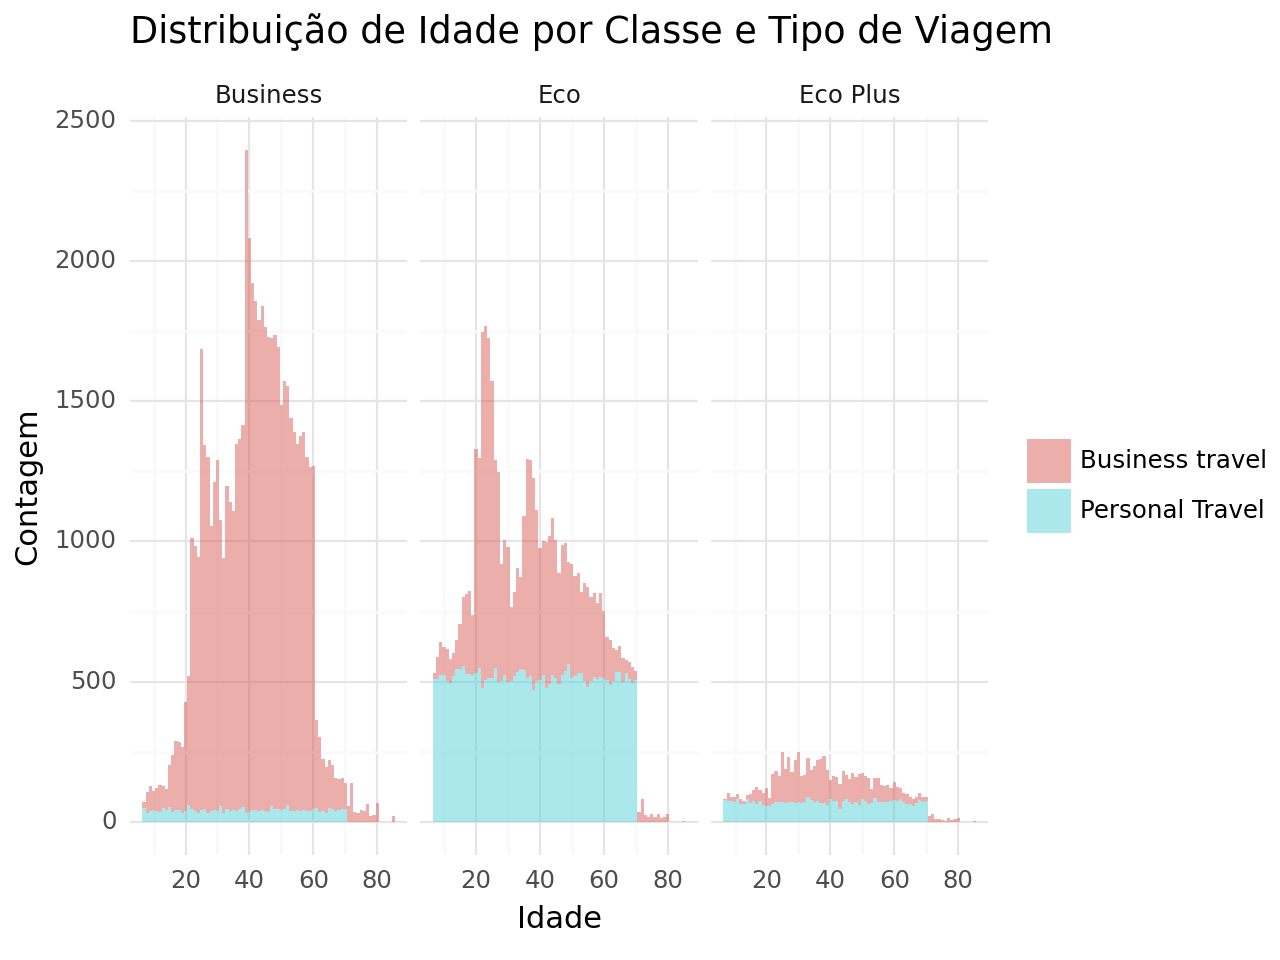

In [63]:
g = (
    ggplot(data=df, mapping=aes(x='age', fill='type_of_travel'))
    + geom_histogram(binwidth=1, alpha=.5)
    + theme_minimal()
    + theme(legend_title=element_blank())
    + facet_grid('. ~ class')
    + labs(
        title='Distribuição de Idade por Classe e Tipo de Viagem',
        x='Idade',
        y='Contagem'
    )
)
print(g)


In [25]:
cols = ['baggage_handling', 'check_in_service', 'cleanliness', 'departure_arrival_time_convenient',
        'ease_of_online_booking', 'food_and_drink', 'gate_location', 'inflight_entertainment',
        'inflight_service', 'inflight_wifi_service', 'leg_room_service', 'on_board_service',
        'online_boarding', 'seat_comfort']

df_satisfaction_1 = df[df['satisfaction'] == 'satisfied']
means_satisfaction_1 = df_satisfaction_1[cols].mean()

df_satisfaction_0 = df[df['satisfaction'] == 'neutral or dissatisfied']
means_satisfaction_0 = df_satisfaction_0[cols].mean()

N = len(cols)

angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

values_satisfaction_1 = means_satisfaction_1.values.tolist()
values_satisfaction_1 += values_satisfaction_1[:1]

values_satisfaction_0 = means_satisfaction_0.values.tolist()
values_satisfaction_0 += values_satisfaction_0[:1]

fig = go.Figure()
fig.add_trace(go.Scatterpolar(
      r=values_satisfaction_1,
      theta=cols,
      fill='toself',
      name='Satisfação 1'
))
fig.add_trace(go.Scatterpolar(
      r=values_satisfaction_0,
      theta=cols,
      fill='toself',
      name='Satisfação 0'
))
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5]
    )),
  showlegend=True,
  title='Gráfico Polar das Médias das Avaliações (Satisfação 1 e Satisfação 0)',
  width=800,  
  height=600  
)
fig.show()


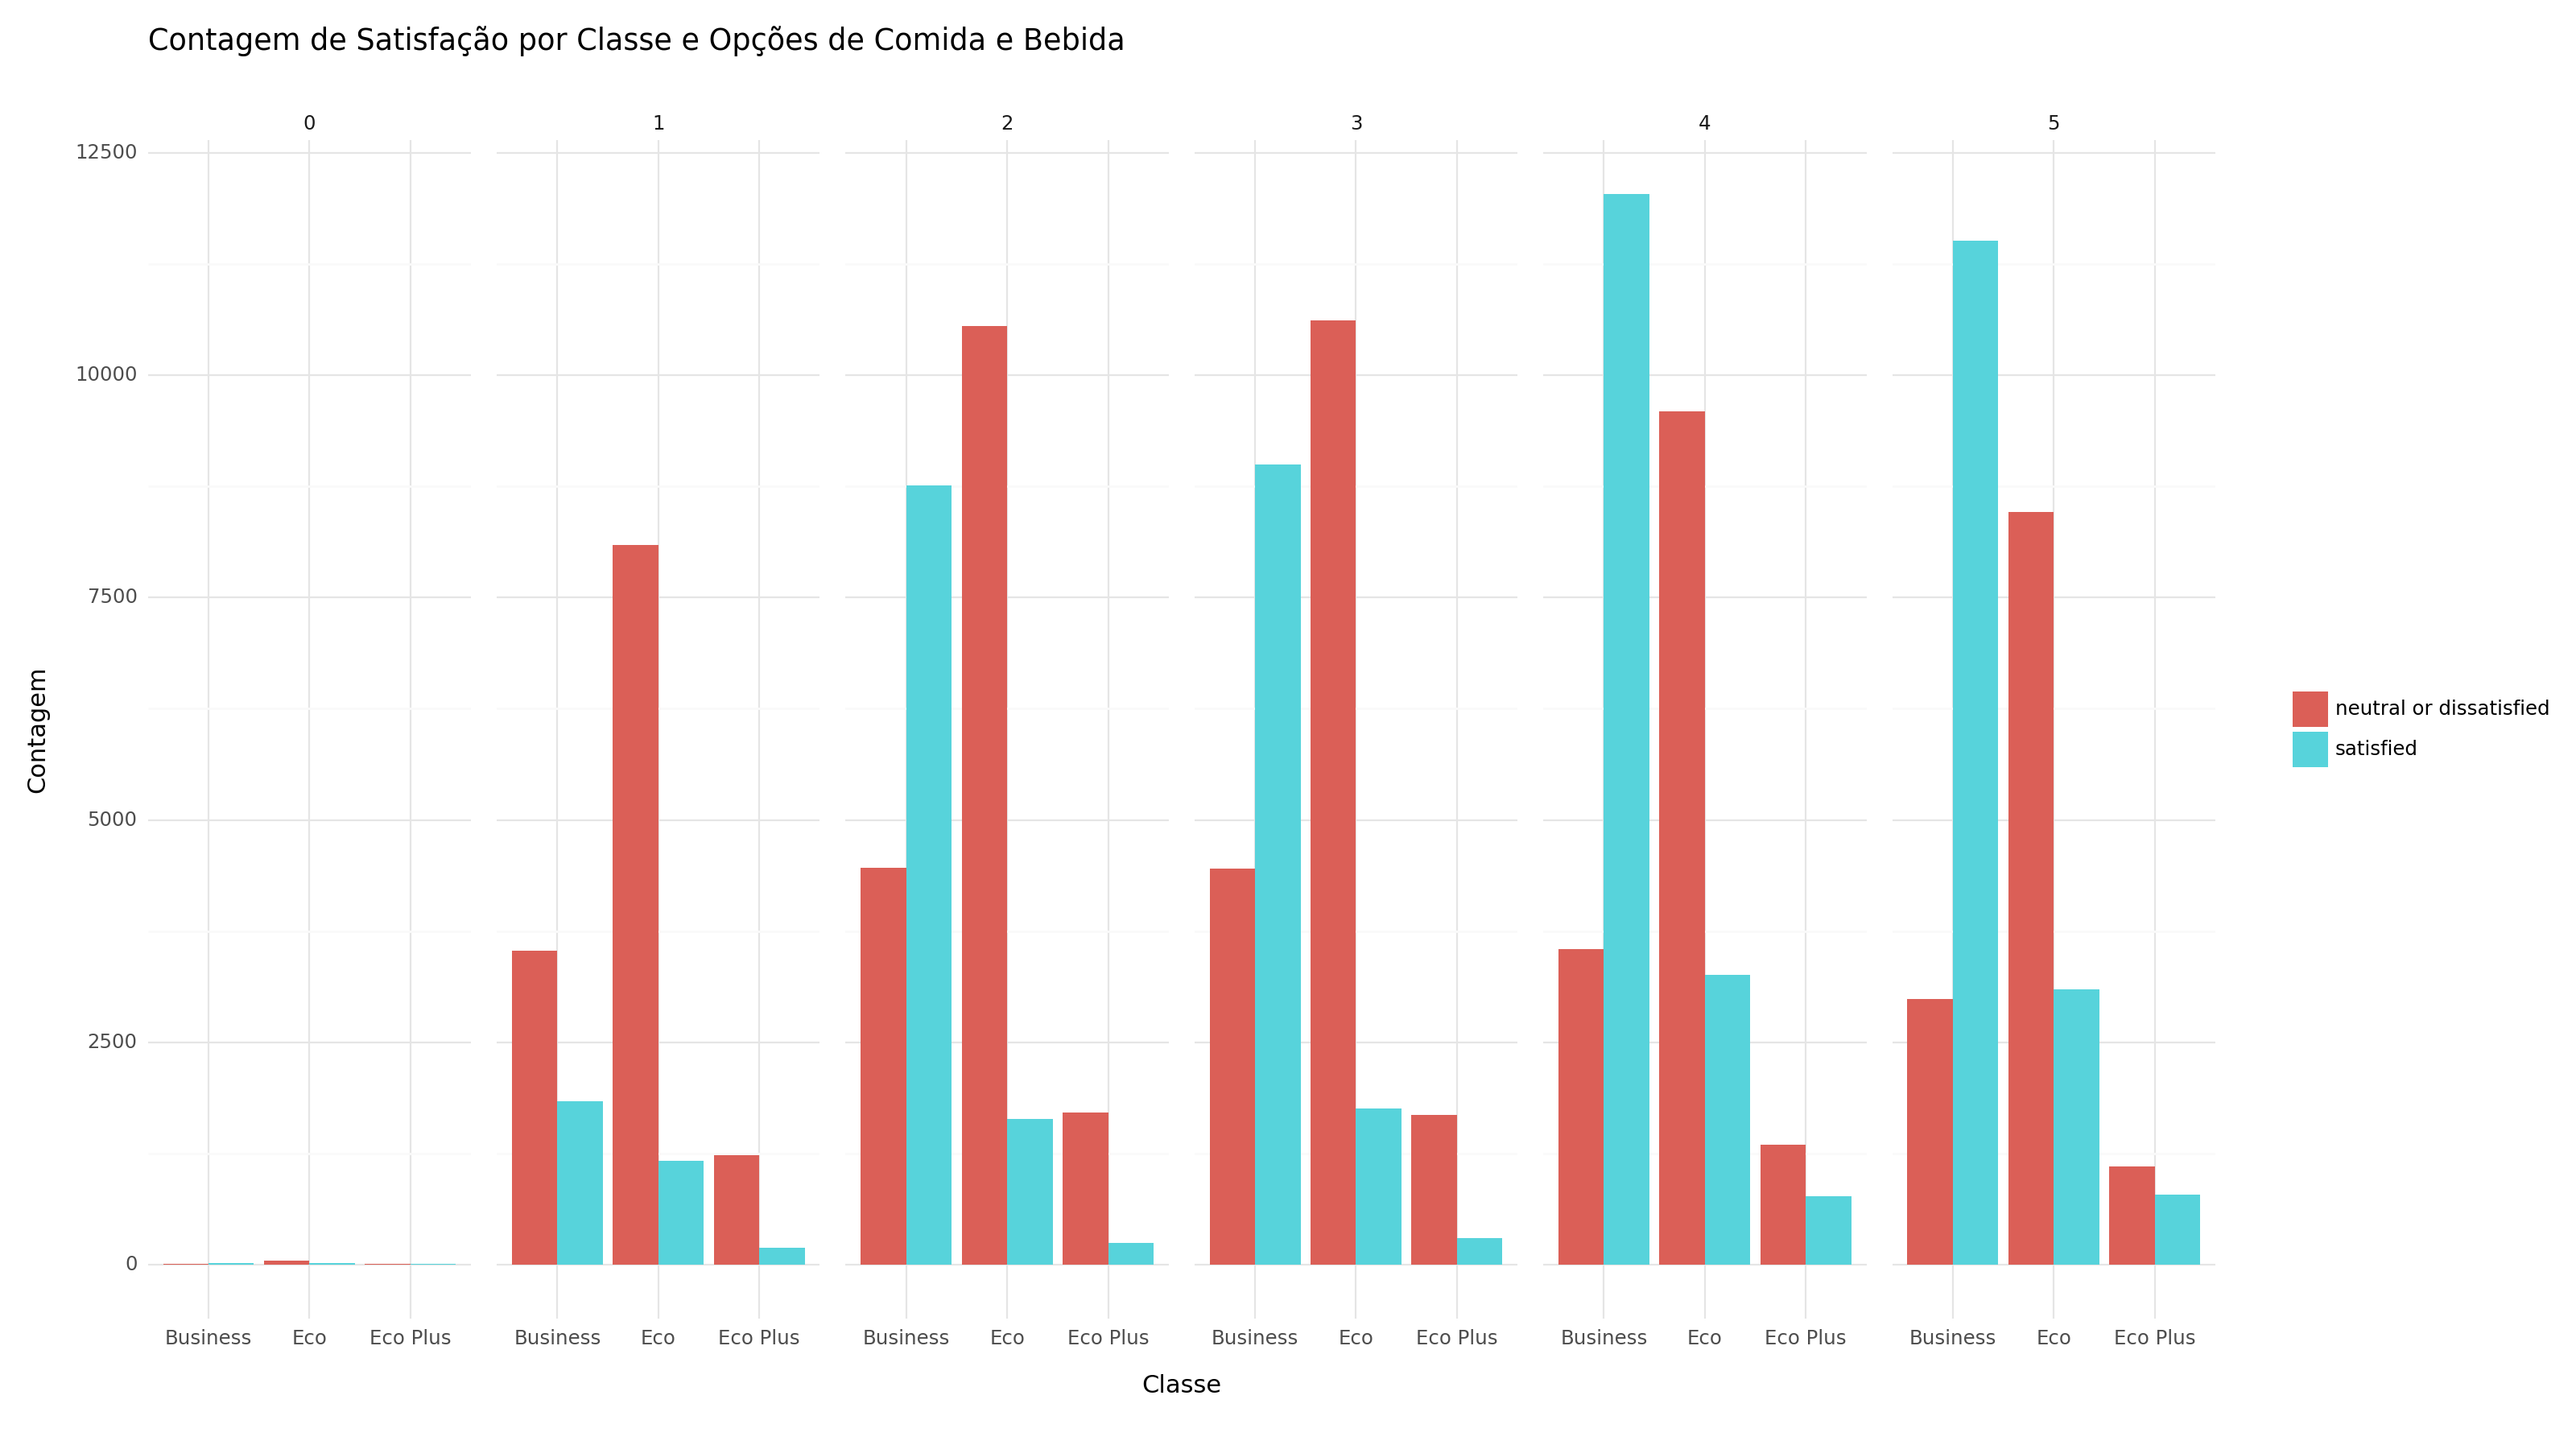

In [25]:
g = (
    ggplot(data=df)
    + geom_col(
        aes(x='class', fill='satisfaction'),
        stat='count',
        position='dodge'
    )
    + facet_grid('. ~ food_and_drink')
    + theme_minimal()
    + theme(legend_title=element_blank(), figure_size=(16, 9))
    + labs(
        title='Contagem de Satisfação por Classe e Opções de Comida e Bebida',
        x='Classe',
        y='Contagem'
    )
)
print(g)

A maior satisfação com a comida se mostra nos passageiros que viajam de classe executiva.

In [26]:
# df['gender'] = np.where(df['gender'] == 'Male', 0, 1)
# df['satisfaction'] = np.where(df['satisfaction'] == 'satisfied', 0, 1)
# df['type_of_travel'] = np.where(df['type_of_travel'] == 'Business travel', 0, 1)
# df['customer_type'] = np.where(df['customer_type'] == 'Loyal Customer', 0, 1)

df.select_dtypes("object")

,gender,customer_type,type_of_travel,class,satisfaction
0,Female,Loyal Customer,Business travel,Eco,satisfied
1,Female,Loyal Customer,Business travel,Business,satisfied
2,Male,disloyal Customer,Business travel,Eco,neutral or dissatisfied
3,Male,Loyal Customer,Business travel,Business,satisfied
4,Female,Loyal Customer,Business travel,Eco,satisfied
...,...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied
103900,Male,Loyal Customer,Business travel,Business,satisfied
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
103902,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied


In [82]:
# Unique values
pp = PrettyPrinter(indent=4)
pp.pprint({column: sorted(list(df[column].unique())) for column in df.select_dtypes('int64').drop(['flight_distance', 'departure_delay_in_minutes', 'age', 'id'], axis=1).columns})

{   'baggage_handling': [1, 2, 3, 4, 5],
    'check_in_service': [0, 1, 2, 3, 4, 5],
    'cleanliness': [0, 1, 2, 3, 4, 5],
    'departure_arrival_time_convenient': [0, 1, 2, 3, 4, 5],
    'ease_of_online_booking': [0, 1, 2, 3, 4, 5],
    'food_and_drink': [0, 1, 2, 3, 4, 5],
    'gate_location': [0, 1, 2, 3, 4, 5],
    'inflight_entertainment': [0, 1, 2, 3, 4, 5],
    'inflight_service': [0, 1, 2, 3, 4, 5],
    'inflight_wifi_service': [0, 1, 2, 3, 4, 5],
    'leg_room_service': [0, 1, 2, 3, 4, 5],
    'on_board_service': [0, 1, 2, 3, 4, 5],
    'online_boarding': [0, 1, 2, 3, 4, 5],
    'seat_comfort': [0, 1, 2, 3, 4, 5]}


In [83]:
df.columns

Index(['id', 'gender', 'customer_type', 'age', 'type_of_travel', 'class',
       'flight_distance', 'inflight_wifi_service',
       'departure_arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'on_board_service', 'leg_room_service',
       'baggage_handling', 'check_in_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'satisfaction'],
      dtype='object')

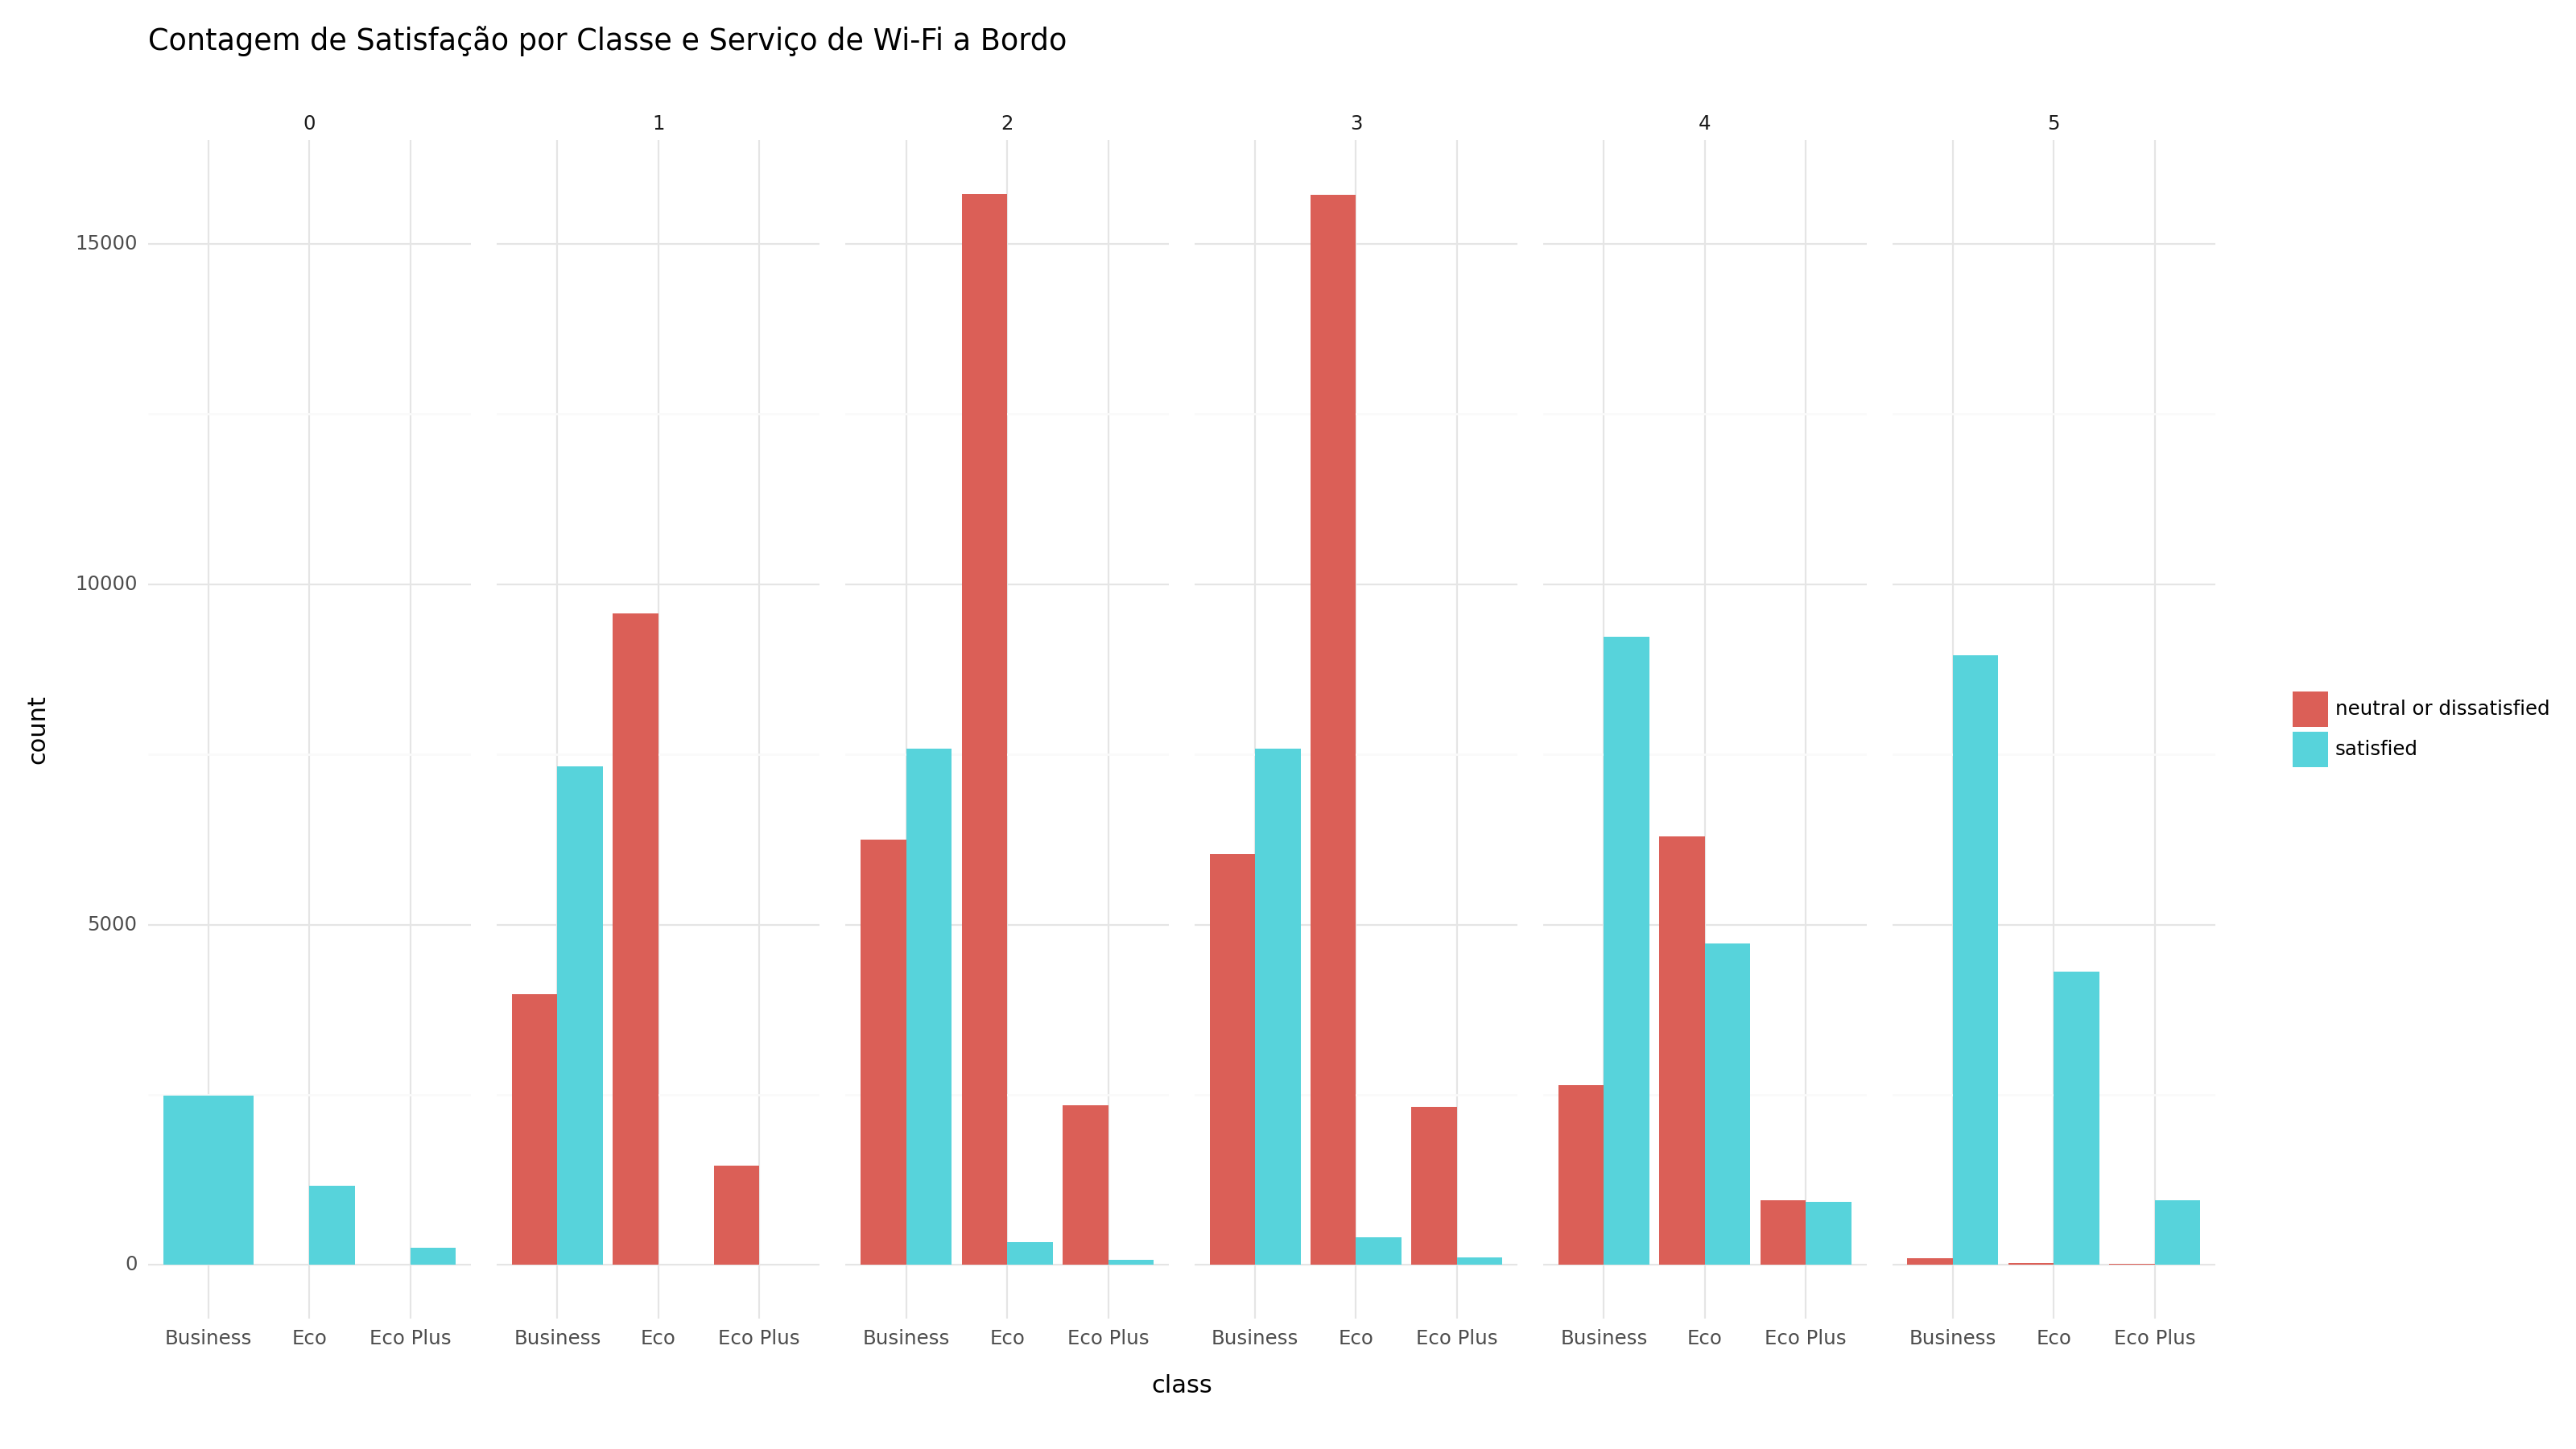

In [90]:
g = (
    ggplot(data=df)
    + geom_col(
        aes(
            x='class',
            fill='satisfaction'
        ),
        stat='count',
        position='dodge'
    )
    + facet_grid('.~inflight_wifi_service')
    + theme_minimal()
    + theme(legend_title=element_blank(), figure_size=(16, 9))
    + labs(title='Contagem de Satisfação por Classe e Serviço de Wi-Fi a Bordo')
)

print(g)

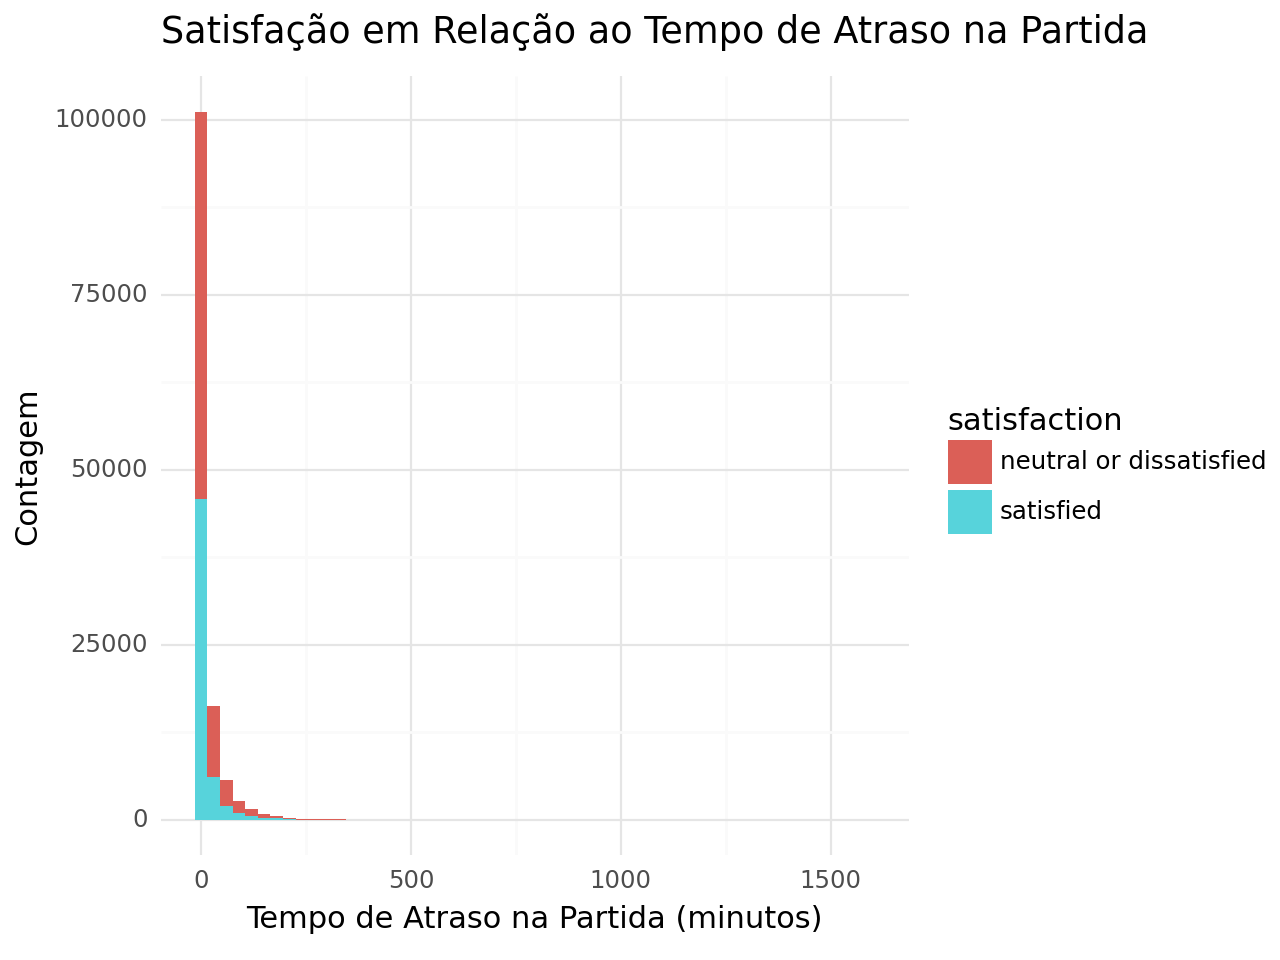

In [140]:
g = (
    ggplot(data=df)
    + geom_histogram(
        aes(x='departure_delay_in_minutes', fill='satisfaction'),
        binwidth=30,
    )
    + theme_minimal()
    + labs(
        x='Tempo de Atraso na Partida (minutos)',
        y='Contagem',
        title='Satisfação em Relação ao Tempo de Atraso na Partida'
    )
)
print(g)

In [84]:
pp.pprint({column: sorted(list(df[column].unique())) for column in df.select_dtypes('object').columns})

{   'class': ['Business', 'Eco', 'Eco Plus'],
    'customer_type': ['Loyal Customer', 'disloyal Customer'],
    'gender': ['Female', 'Male'],
    'satisfaction': ['neutral or dissatisfied', 'satisfied'],
    'type_of_travel': ['Business travel', 'Personal Travel']}


In [85]:
label_encoder = LabelEncoder()

In [86]:
for column in {column: sorted(list(df[column].unique())) for column in df.select_dtypes('object').columns}.keys():
    label_encoder.fit(df[column])
    df[column] = label_encoder.transform(df[column])

In [34]:
df.head().T

,0,1,2,3,4
id,19556,90035,12360,77959,36875
gender,0,0,1,1,0
customer_type,0,0,1,0,0
age,52,36,20,44,49
type_of_travel,0,0,0,0,0
class,1,0,1,0,1
flight_distance,160,2863,192,3377,1182
inflight_wifi_service,5,1,2,0,2
departure_arrival_time_convenient,4,1,0,0,3
ease_of_online_booking,3,3,2,0,4


In [87]:
correlations = [] 

for col in cols:
    contingency_table = pd.crosstab(df['satisfaction'], df[col])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    correlation = (col, chi2, p)
    correlations.append(correlation)

correlation_df = pd.DataFrame(correlations, columns=['Variável', 'Valor qui-quadrado', 'Valor p'])

print(correlation_df)

                             Variável  Valor qui-quadrado        Valor p
0                    baggage_handling        10820.213523   0.000000e+00
1                    check_in_service         8143.773216   0.000000e+00
2                         cleanliness        12948.918125   0.000000e+00
3   departure_arrival_time_convenient          601.462958  9.767302e-128
4              ease_of_online_booking        12846.702395   0.000000e+00
5                      food_and_drink         6571.202895   0.000000e+00
6                       gate_location         3069.907992   0.000000e+00
7              inflight_entertainment        23071.602435   0.000000e+00
8                    inflight_service        10357.930495   0.000000e+00
9               inflight_wifi_service        35891.433370   0.000000e+00
10                   leg_room_service        15200.778756   0.000000e+00
11                   on_board_service        14342.659690   0.000000e+00
12                    online_boarding        49531.

Todas as variáveis têm valores de qui-quadrado significativamente diferentes de zero, pois os valores p são muito próximos de zero (menores que 0,05). Isso indica que há uma associação estatisticamente significativa entre cada uma das variáveis ea variavel target.

Os valores do qui-quadrado são diferentes para cada variável, indicando que a associação entre essas variáveis e a target são diferentes. Algumas variáveis podem ter uma associação mais forte do que outras.

In [155]:
df['flight_distance'].describe()

count    129880.000000
mean       1190.316392
std         997.452477
min          31.000000
25%         414.000000
50%         844.000000
75%        1744.000000
max        4983.000000
Name: flight_distance, dtype: float64

In [154]:
df.groupby('satisfaction')['flight_distance'].mean()

satisfaction
0     929.715420
1    1529.539165
Name: flight_distance, dtype: float64

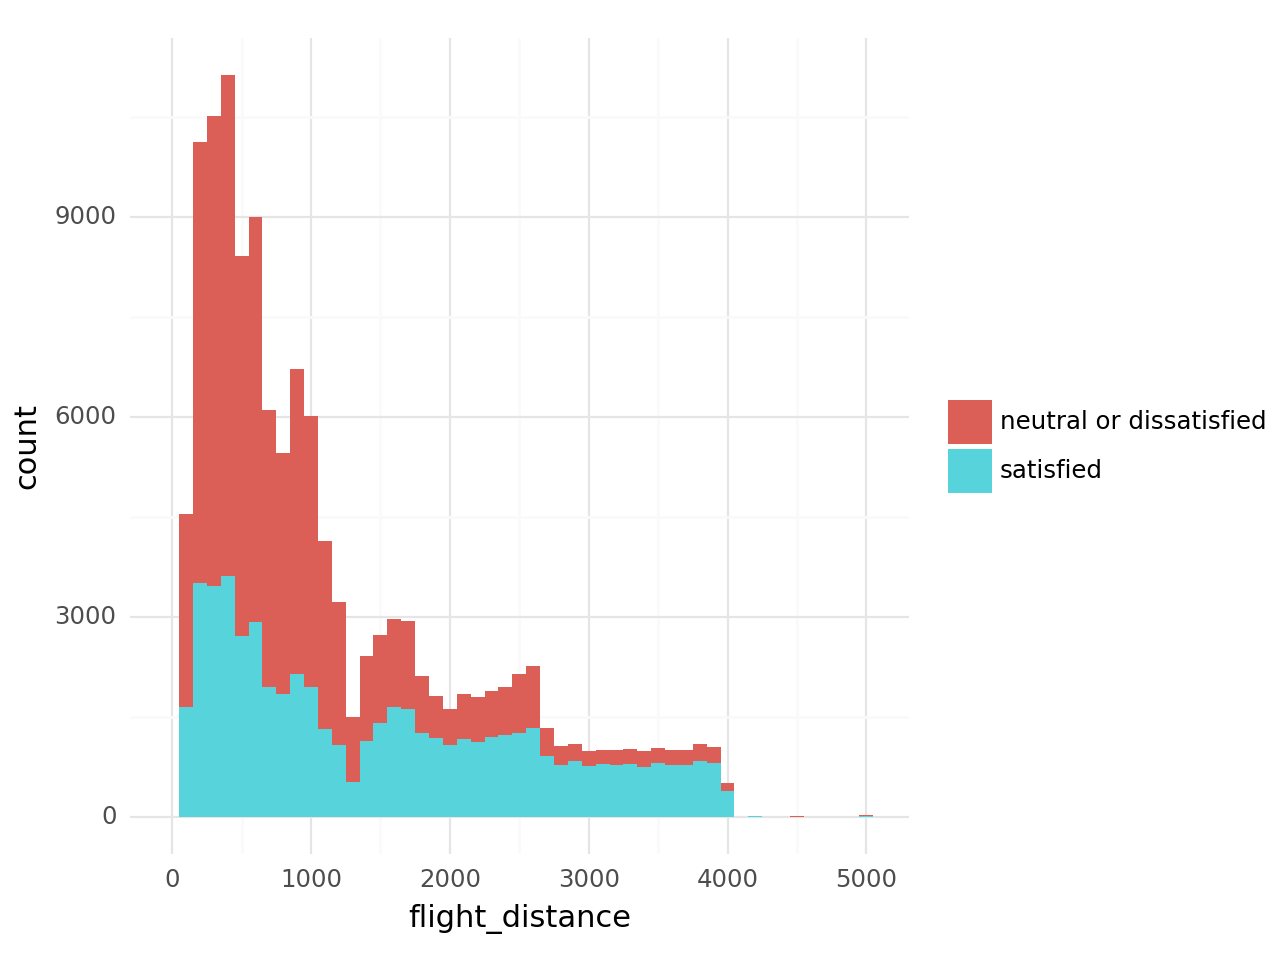

In [22]:
g=(
    ggplot(data=df)
    +geom_histogram(
        aes(x='flight_distance', fill='satisfaction'),
        binwidth=100,
    )
    +theme_minimal()
    +theme(legend_title=element_blank()) 
)
print(g)

Voôs mais longos com maior satisfação dos clientes do que voôs mais curtos. Os voôs mais longos são em sua maioria a negócios?

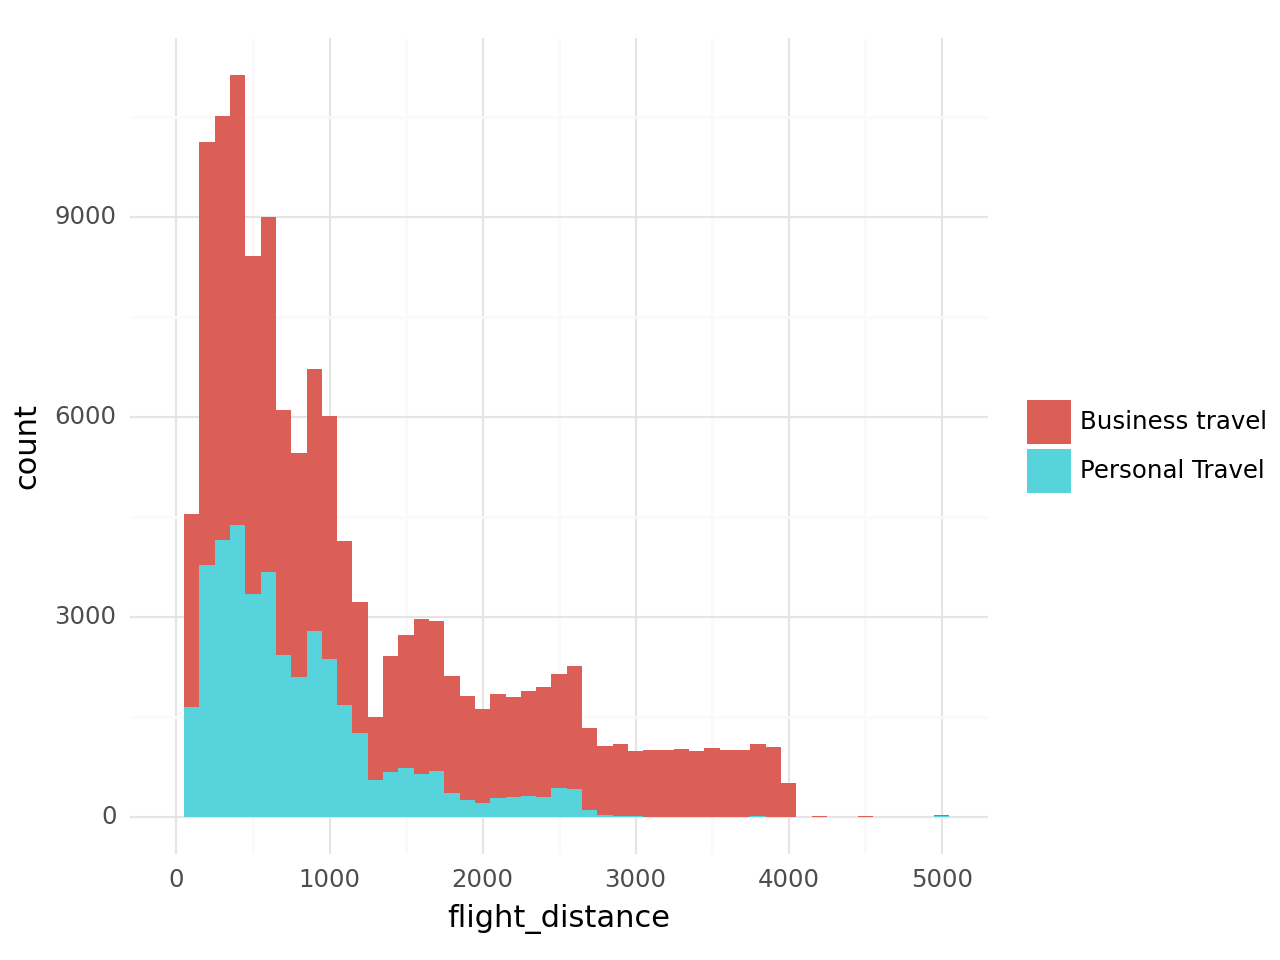

In [23]:
g=(
    ggplot(data=df)
    +geom_histogram(
        aes(x='flight_distance', fill='type_of_travel'),
        binwidth=100,
    )
    +theme_minimal()
    +theme(legend_title=element_blank()) 
)
print(g)

Conforme esperado, voôs mais longos são em sua maioria a negócios, o que ajuda a entender a maior satisfação destes clientes! 

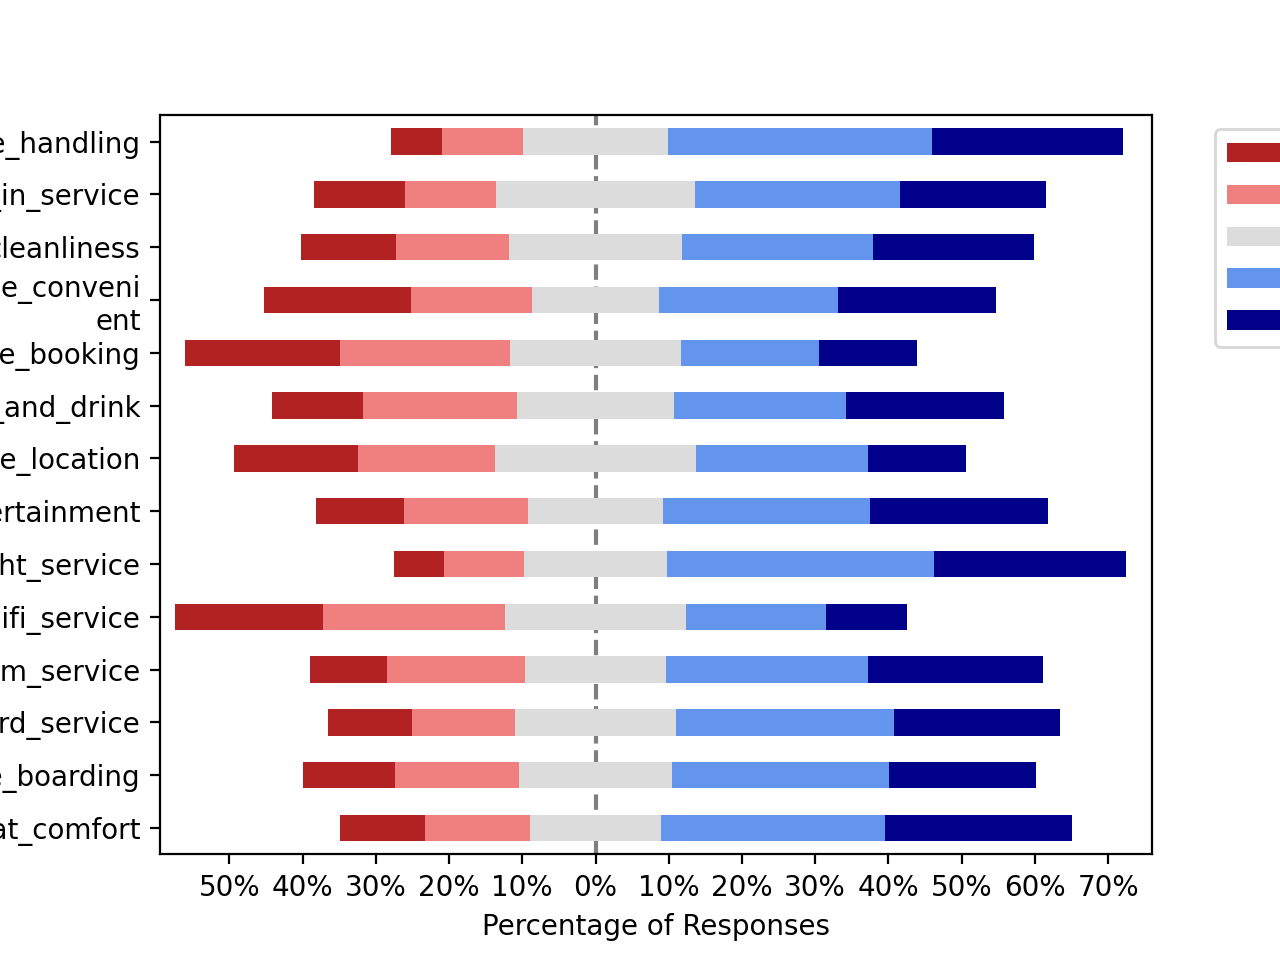

In [121]:
likert_scale_mapping = {
    1: 'Strongly disagree',
    2: 'Disagree',
    3: 'Neither agree nor disagree',
    4: 'Agree',
    5: 'Strongly agree'
}

df_likert = df[cols].copy()
df_likert.replace(0, 1, inplace=True)
df_likert = df_likert.replace(likert_scale_mapping)

plot_likert.plot_likert(
    df_likert,
    plot_likert.scales.agree,
    plot_percentage=True
);
plt.show()

In [ ]:
pesq_satisf = df.columns[7:21]

In [ ]:
for i in pesq_satisf:
    print(i, ': Most costumers votting:', df[i].mode().values)

inflight_wifi_service : Most costumers votting: [2]
departure_arrival_time_convenient : Most costumers votting: [4]
ease_of_online_booking : Most costumers votting: [3]
gate_location : Most costumers votting: [3]
food_and_drink : Most costumers votting: [4]
online_boarding : Most costumers votting: [4]
seat_comfort : Most costumers votting: [4]
inflight_entertainment : Most costumers votting: [4]
on_board_service : Most costumers votting: [4]
leg_room_service : Most costumers votting: [4]
baggage_handling : Most costumers votting: [4]
check_in_service : Most costumers votting: [4]
inflight_service : Most costumers votting: [4]
cleanliness : Most costumers votting: [4]


A insatisfação com o Wi-fi parece refletir na satisfação final dos clientes

## Início do modelo

Nosso problema será de classificação. Teremos de criar e otimizar um modelo para prever se um cliente sairá satisfeito ou não com a experiência que teve com a companhia aérea.

Opções de modelos
- Regressão Logística
- Árvore de Decisão
- Random Forest
- Adaboost

In [164]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix

In [ ]:
df['flight_distance'].describe()

count    129880.000000
mean       1190.316392
std         997.452477
min          31.000000
25%         414.000000
50%         844.000000
75%        1744.000000
max        4983.000000
Name: flight_distance, dtype: float64

In [ ]:
df['arrival_delay_in_minutes'].describe()

count    129880.000000
mean         15.045465
std          38.416353
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: arrival_delay_in_minutes, dtype: float64

In [ ]:
df.describe()

,id,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,check_in_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,...,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,0.492616,0.183092,39.427957,0.309416,0.593864,1190.316392,2.728696,3.057599,2.756876,...,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.045465,0.434463
std,37493.270818,0.499947,0.386743,15.119360,0.462255,0.621378,997.452477,1.329340,1.526741,1.401740,...,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.416353,0.495688
min,1.000000,0.000000,0.000000,7.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32470.750000,0.000000,0.000000,27.000000,0.000000,0.000000,414.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,64940.500000,0.000000,0.000000,40.000000,0.000000,1.000000,844.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,97410.250000,1.000000,0.000000,51.000000,1.000000,1.000000,1744.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,129880.000000,1.000000,1.000000,85.000000,1.000000,2.000000,4983.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


Colunas a normalizar: 

- `flight_distance`
- `arrival_delay_in_minutes`
- `departure_delay_in_minutes`

In [158]:
from sklearn.preprocessing import StandardScaler 

In [165]:
# Normalizando os dados
std = StandardScaler()
df[['flight_distance', 'arrival_delay_in_minutes', 'departure_delay_in_minutes']] = std.fit_transform(df[['flight_distance', 'arrival_delay_in_minutes', 'departure_delay_in_minutes']])

In [ ]:
# Removendo a coluna 'id'.
df.drop('id', axis=1, inplace=True)

In [167]:
df.head(3).T

,0,1,2
gender,0.000000,0.000000,1.000000
customer_type,0.000000,0.000000,1.000000
age,52.000000,36.000000,20.000000
type_of_travel,0.000000,0.000000,0.000000
class,1.000000,0.000000,1.000000
flight_distance,-1.032952,1.676962,-1.000870
inflight_wifi_service,5.000000,1.000000,2.000000
departure_arrival_time_convenient,4.000000,1.000000,0.000000
ease_of_online_booking,3.000000,3.000000,2.000000
gate_location,4.000000,1.000000,4.000000


In [168]:
# Separando features e target
X = df.drop('satisfaction', axis=1)
y = np.where(df['satisfaction'] == 0, 1, 0) # invertemos -> classe de interesse são os não-satisfeitos

# Separando treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y, random_state=42)

In [169]:
# Treinando os modelos
models = {
    'logistic_regression': LogisticRegression(),
    'decision_tree_classifier': DecisionTreeClassifier(),
    'random_forest_classifier': RandomForestClassifier(),
    'adaboost_classifier': AdaBoostClassifier()
}

results = []

for model in models.values():
    kf = StratifiedKFold(n_splits=6, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kf, scoring='f1')
    results.append(cv_results)


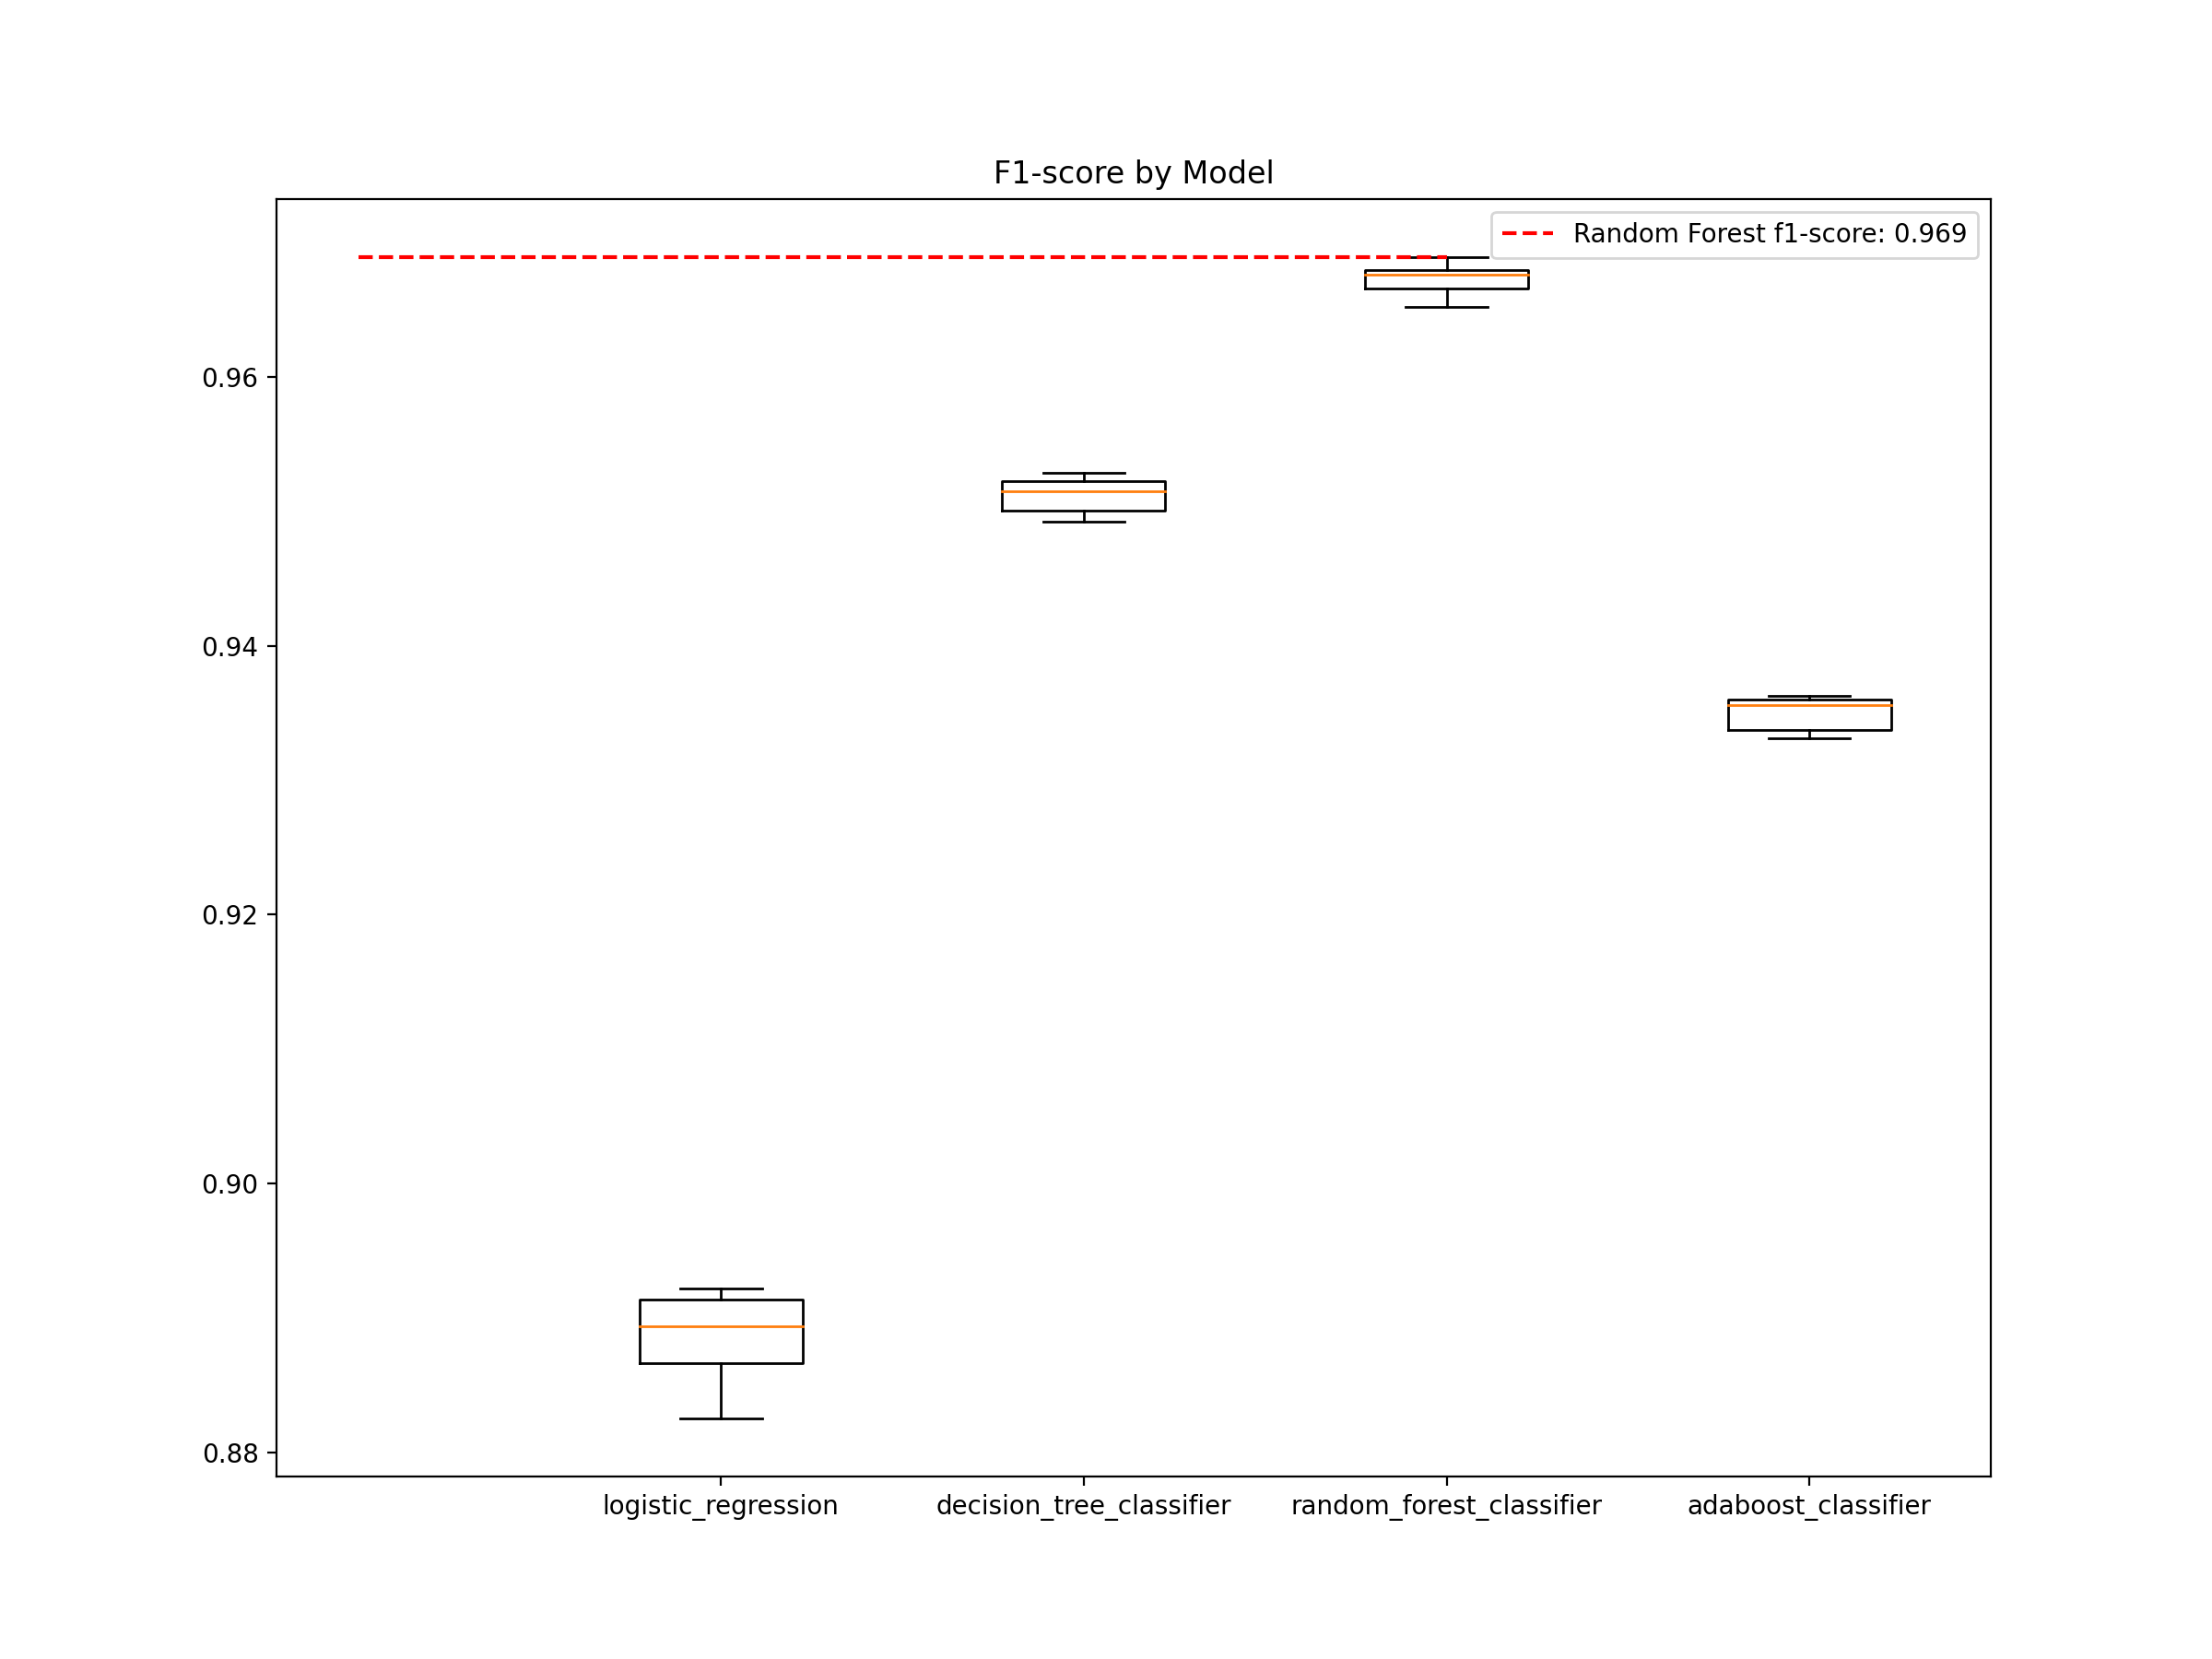

In [ ]:
plt.figure(figsize=(12,9))
plt.boxplot(results, labels=models.keys())
plt.hlines(results[2].max(), 0, 3, colors='r', linestyles='dashed', label=f'Random Forest f1-score: {round(results[2].max(), 3)}')
plt.title("F1-score by Model")
plt.legend()
plt.show()

In [170]:
from sklearn.metrics import classification_report

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name}:\n", classification_report(y_test, y_pred))

logistic_regression:
               precision    recall  f1-score   support

           0       0.86      0.83      0.85     11286
           1       0.87      0.90      0.89     14690

    accuracy                           0.87     25976
   macro avg       0.87      0.86      0.87     25976
weighted avg       0.87      0.87      0.87     25976

decision_tree_classifier:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     11286
           1       0.96      0.95      0.95     14690

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976

random_forest_classifier:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96     11286
           1       0.96      0.98      0.97     14690

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     2597

## Hyperparameter Tuning Random Forest Classifier

O modelo escolhido foi o `Random Forest Classifier` por apresentar maior F1-score.

In [ ]:
# Ajustando os hiperparâmetros para realizar o Randomizes Search
params_grid = {
    'n_estimators': np.arange(100, 500),
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': np.arange(1, 33),
    'min_samples_split': np.arange(2, 16),
    'min_samples_leaf': np.arange(1, 100)
}

random_forest_cv = RandomizedSearchCV(models['random_forest_classifier'], params_grid, cv=kf, scoring='f1', n_iter=10, n_jobs=-1)
random_forest_cv.fit(X_train, y_train)

# Imprimindo os melhores parametros
print(random_forest_cv.best_params_, random_forest_cv.best_score_)

{'n_estimators': 385, 'min_samples_split': 8, 'min_samples_leaf': 8, 'max_depth': 17, 'criterion': 'log_loss'} 0.9623888437645892


Como vemos acima, usando o RandomizedSearchCV não conseguimos um resultado de f1-score maior que o anterior. Isso porque esse critério de avaliação do modelo não garante que encontraremos a melhor combinação possível dos hiperparâmetros para a calibração do modelo.

In [174]:
# Imprimindo o score do modelo
print(random_forest_cv.score(X_test, y_test))

0.9587875923988255


In [176]:
from mlxtend.plotting import plot_confusion_matrix

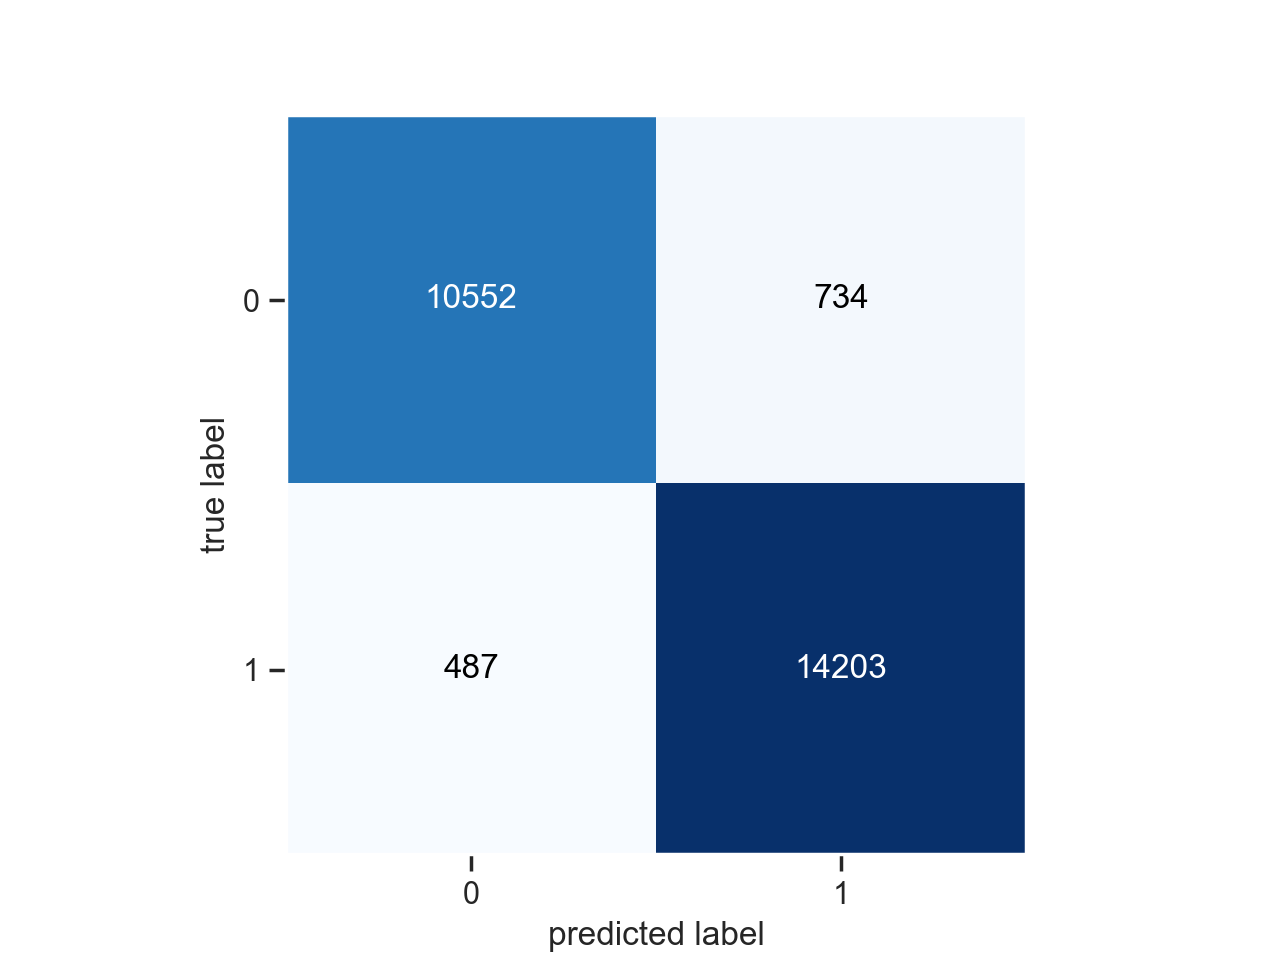

In [177]:
# Realizando predição usando o modelo Random Forest 
y_pred = random_forest_cv.predict(X_test)

# Plotando matriz de confusão
plot_confusion_matrix(confusion_matrix(y_test, y_pred))
plt.show()

In [178]:
# Imprimindo as métricas de avaliação do modelo
print(f"random_forest_classifier:\n", classification_report(y_test, y_pred))

random_forest_classifier:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95     11286
           1       0.95      0.97      0.96     14690

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



Após a otimização do modelo, houve uma melhoria nas métricas de precisão, revocação e pontuação F1 para ambas as classes (0 e 1). A acurácia geral também aumentou, indicando um desempenho aprimorado do modelo.

In [180]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [181]:
# Realizando a avaliação da curva ROC (Receiver Operating Characteristic)
y_prob = random_forest_cv.predict_proba(X_test)[:, 1]  # Probabilidades previstas para a classe positiva (satisfeito)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)  # Calculando as taxas de falsos positivos (FPR) e verdadeiros positivos (TPR)

roc_auc = auc(fpr, tpr)  # Calculando a área sob a curva ROC (AUC)

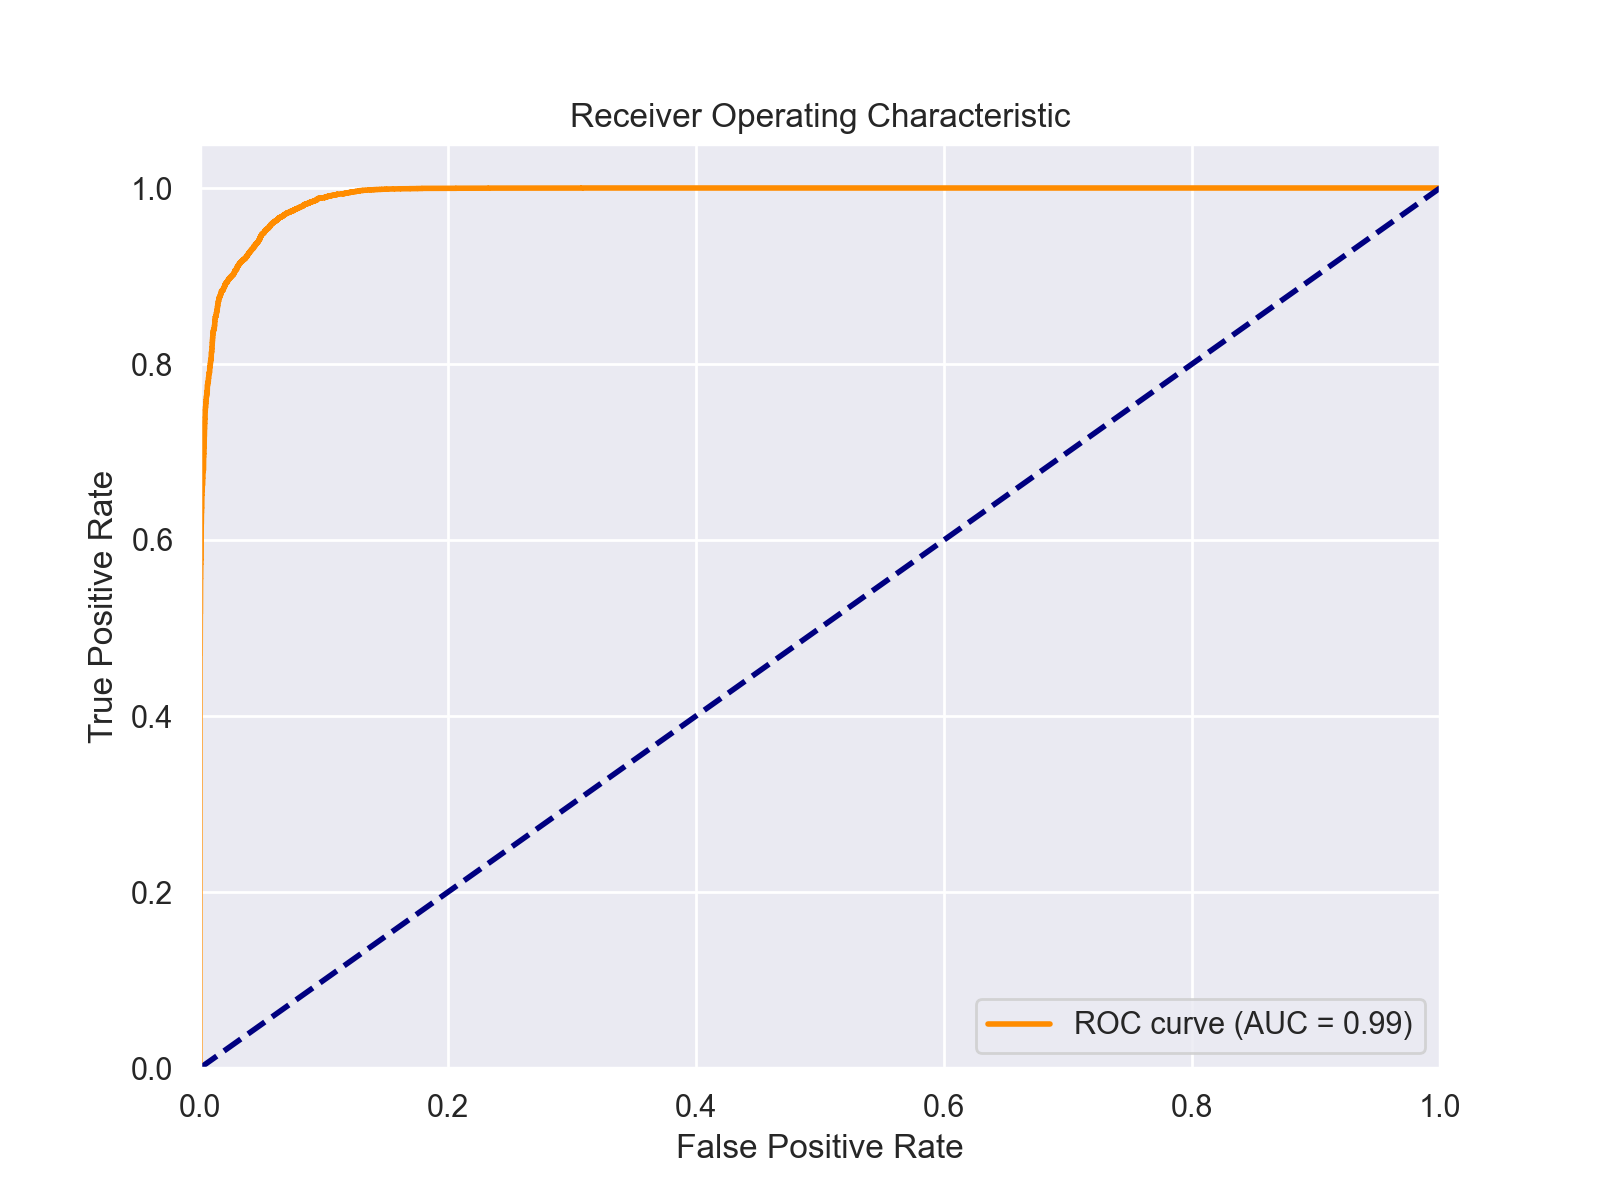

In [182]:
# Plotando curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


O modelo tem uma taxa extremamente baixa de falsos positivos e falsos negativos, e é altamente preciso na classificação das instâncias. Isso é uma indicação muito positiva de que o modelo é altamente confiável e preciso em sua capacidade de distinguir entre as classes. 

## Hyperparameter Tuning Decision Tree Classifier


In [ ]:
# Definindo uma grade de hiperparâmetros para otimização do modelo Decision Tree
params_grid = {
    'criterion': ['gini', 'entropy'],  # Critérios de divisão da árvore
    'max_depth': np.arange(1, 101),    # Profundidade máxima da árvore
    'min_samples_split': np.arange(2, 21),  # Número mínimo de amostras para dividir um nó
    'min_samples_leaf': np.arange(1, 101)  # Número mínimo de amostras em uma folha
}

In [ ]:
# Realizando uma busca aleatória de hiperparâmetros para otimização do modelo Decision Tree utilizando o método RandomizedSearchCV.
random_search = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=params_grid, cv=kf, scoring='f1', n_iter=10, n_jobs=-1)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_  # Melhores hiperparâmetros encontrados
best_score = random_search.best_score_  # Melhor pontuação (F1-score) obtida durante a otimização

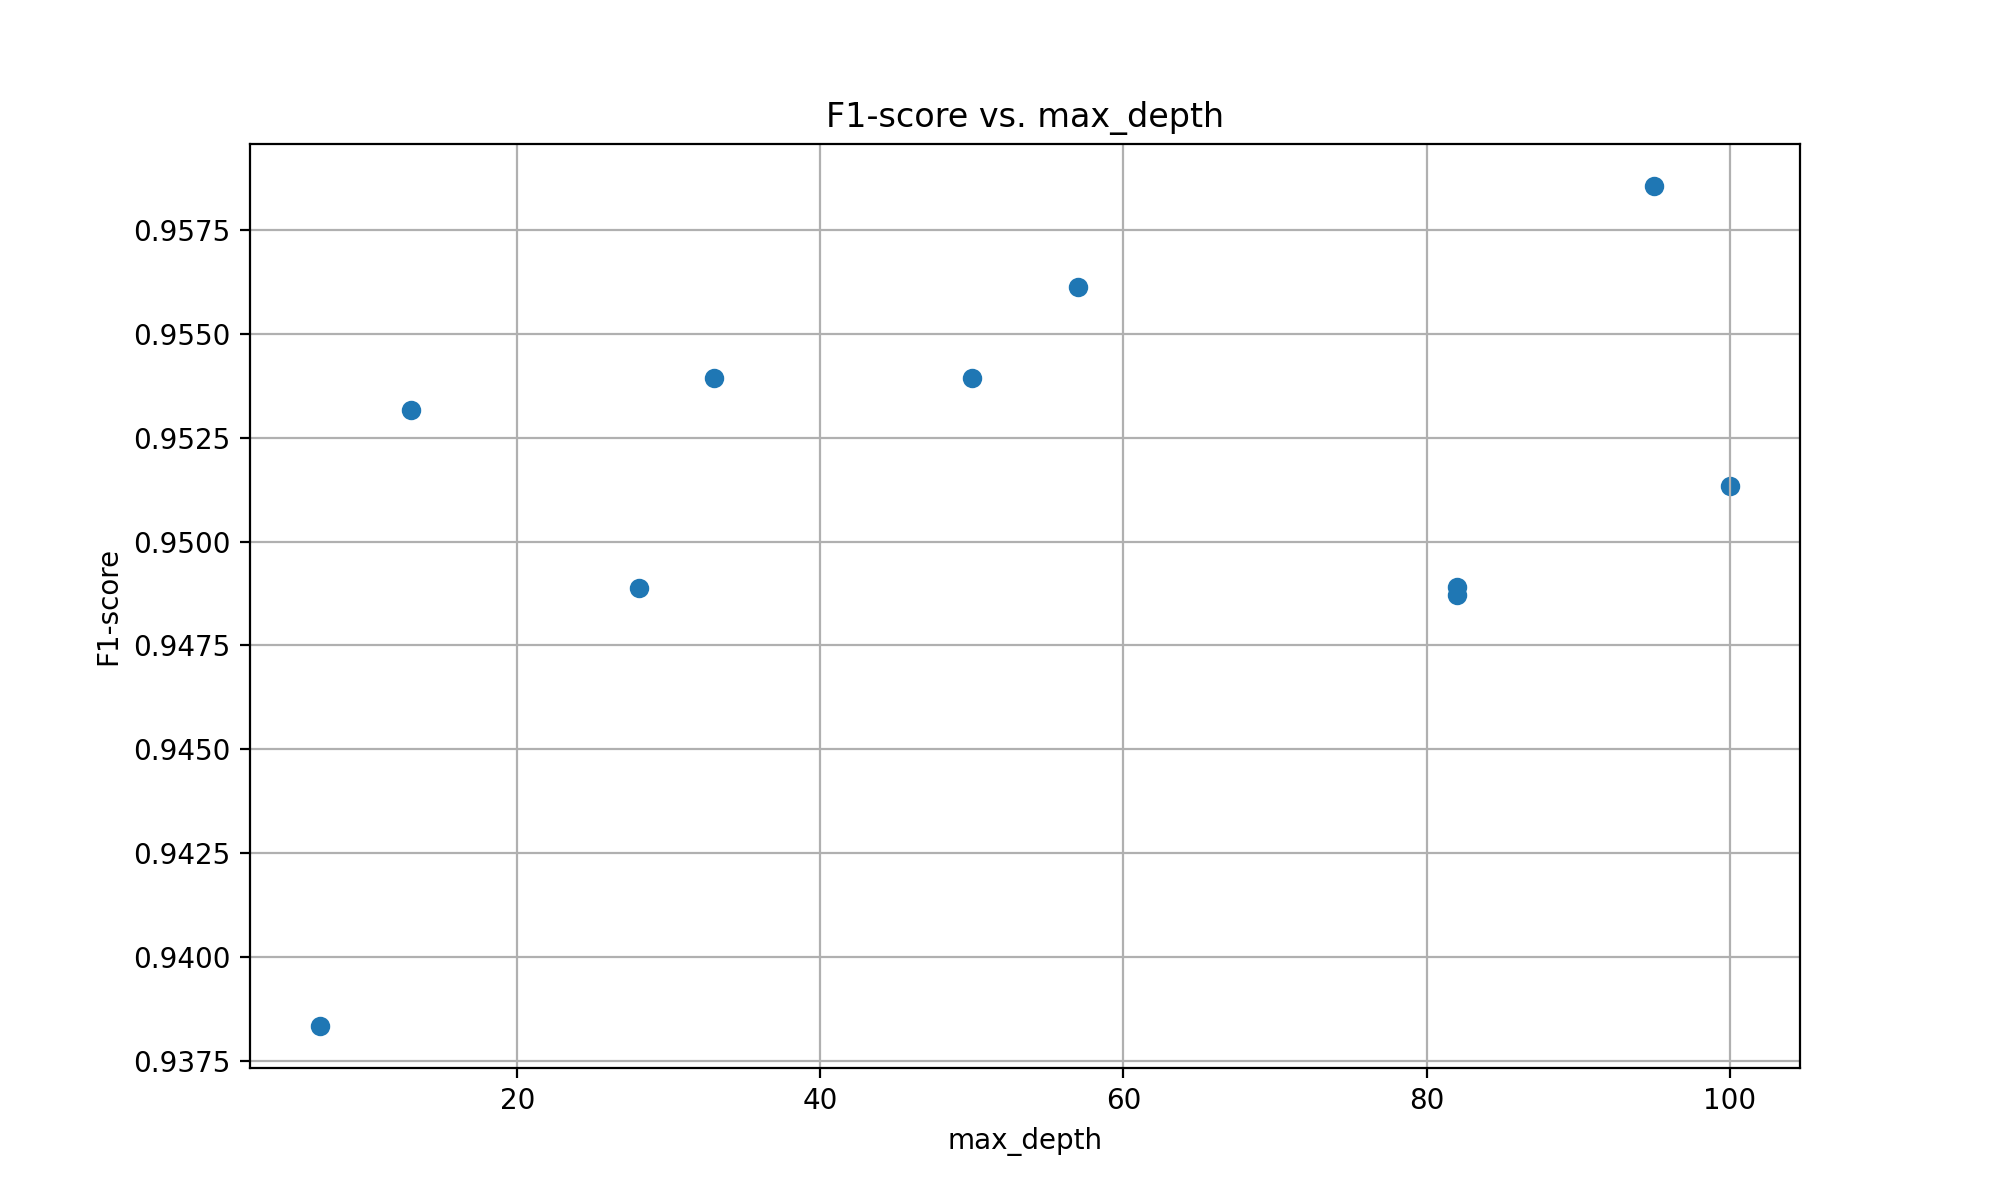

In [ ]:
# Obtendo os resultados da busca aleatória de hiperparâmetros
scores = random_search.cv_results_['mean_test_score']  # Pontuações médias (F1-score) de cada conjunto de hiperparâmetros testado
params = random_search.cv_results_['params']  # Conjunto de hiperparâmetros correspondentes a cada iteração

# Extraindo os valores de max_depth (profundidade máxima) de cada conjunto de hiperparâmetros
max_depth_values = [param['max_depth'] for param in params]

# Plotando os resultados em um gráfico
plt.figure(figsize=(10, 6))
plt.scatter(max_depth_values, scores, marker='o', label='F1-score')
plt.title('F1-score vs. max_depth')
plt.xlabel('max_depth')
plt.ylabel('F1-score')
plt.grid(True)
plt.show()

In [ ]:
best_decision_tree = DecisionTreeClassifier(**best_params)
best_decision_tree.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=95, min_samples_leaf=26,
                       min_samples_split=12)

In [ ]:
y_pred = best_decision_tree.predict(X_test)

In [ ]:
print(f"decision_tree_classifier:\n", classification_report(y_test, y_pred))

decision_tree_classifier:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94     11286
           1       0.95      0.97      0.96     14690

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name}:\n", classification_report(y_test, y_pred))

logistic_regression:
               precision    recall  f1-score   support

           0       0.86      0.83      0.85     11286
           1       0.87      0.90      0.89     14690

    accuracy                           0.87     25976
   macro avg       0.87      0.86      0.87     25976
weighted avg       0.87      0.87      0.87     25976

decision_tree_classifier:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     11286
           1       0.96      0.95      0.95     14690

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976

random_forest_classifier:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96     11286
           1       0.96      0.98      0.97     14690

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     2597

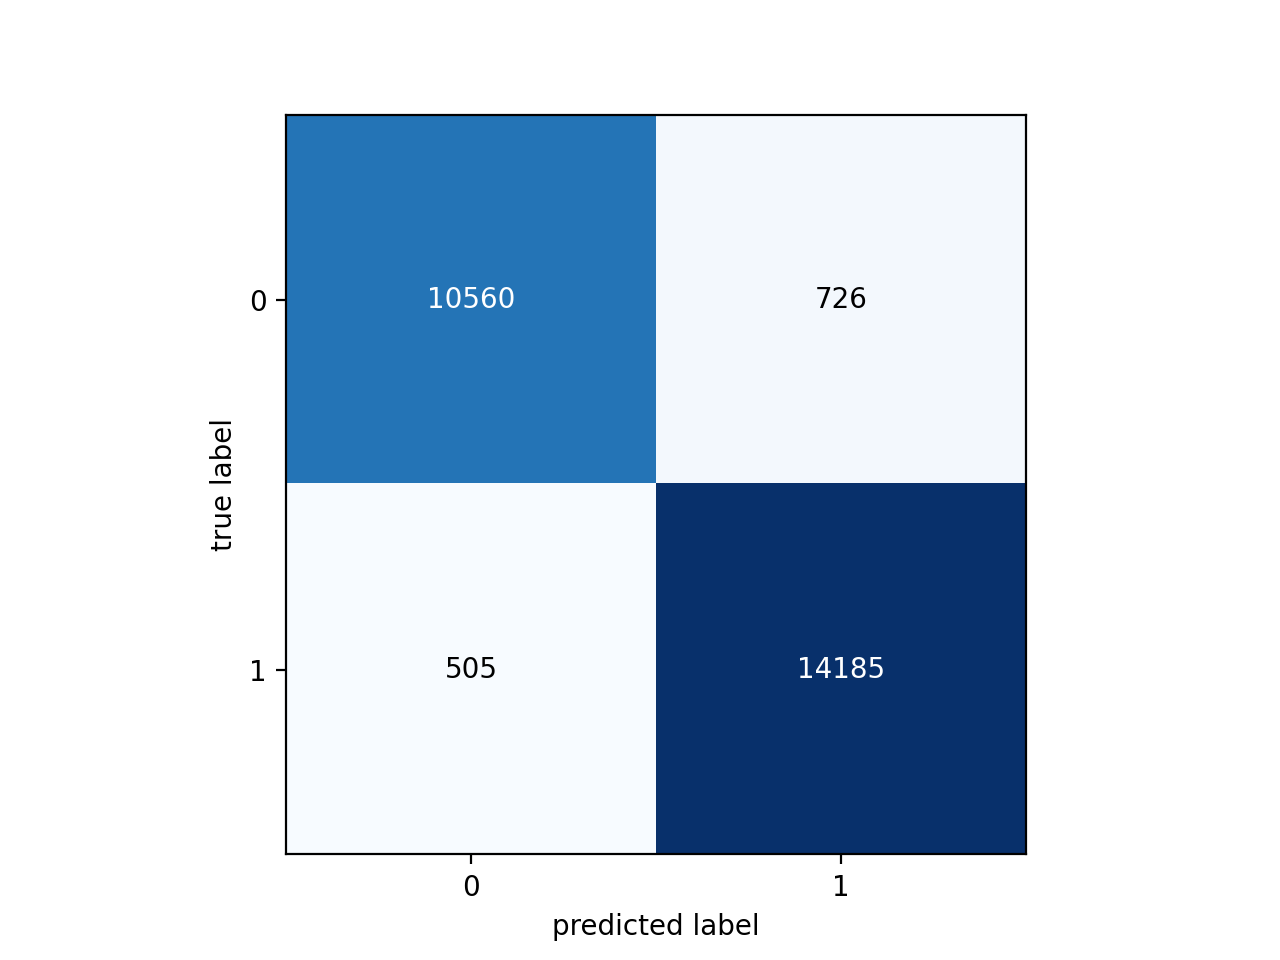

In [ ]:
y_pred = best_decision_tree.predict(X_test)

plot_confusion_matrix(confusion_matrix(y_test, y_pred))
plt.show()

In [ ]:
y_prob = best_decision_tree.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = auc(fpr, tpr)

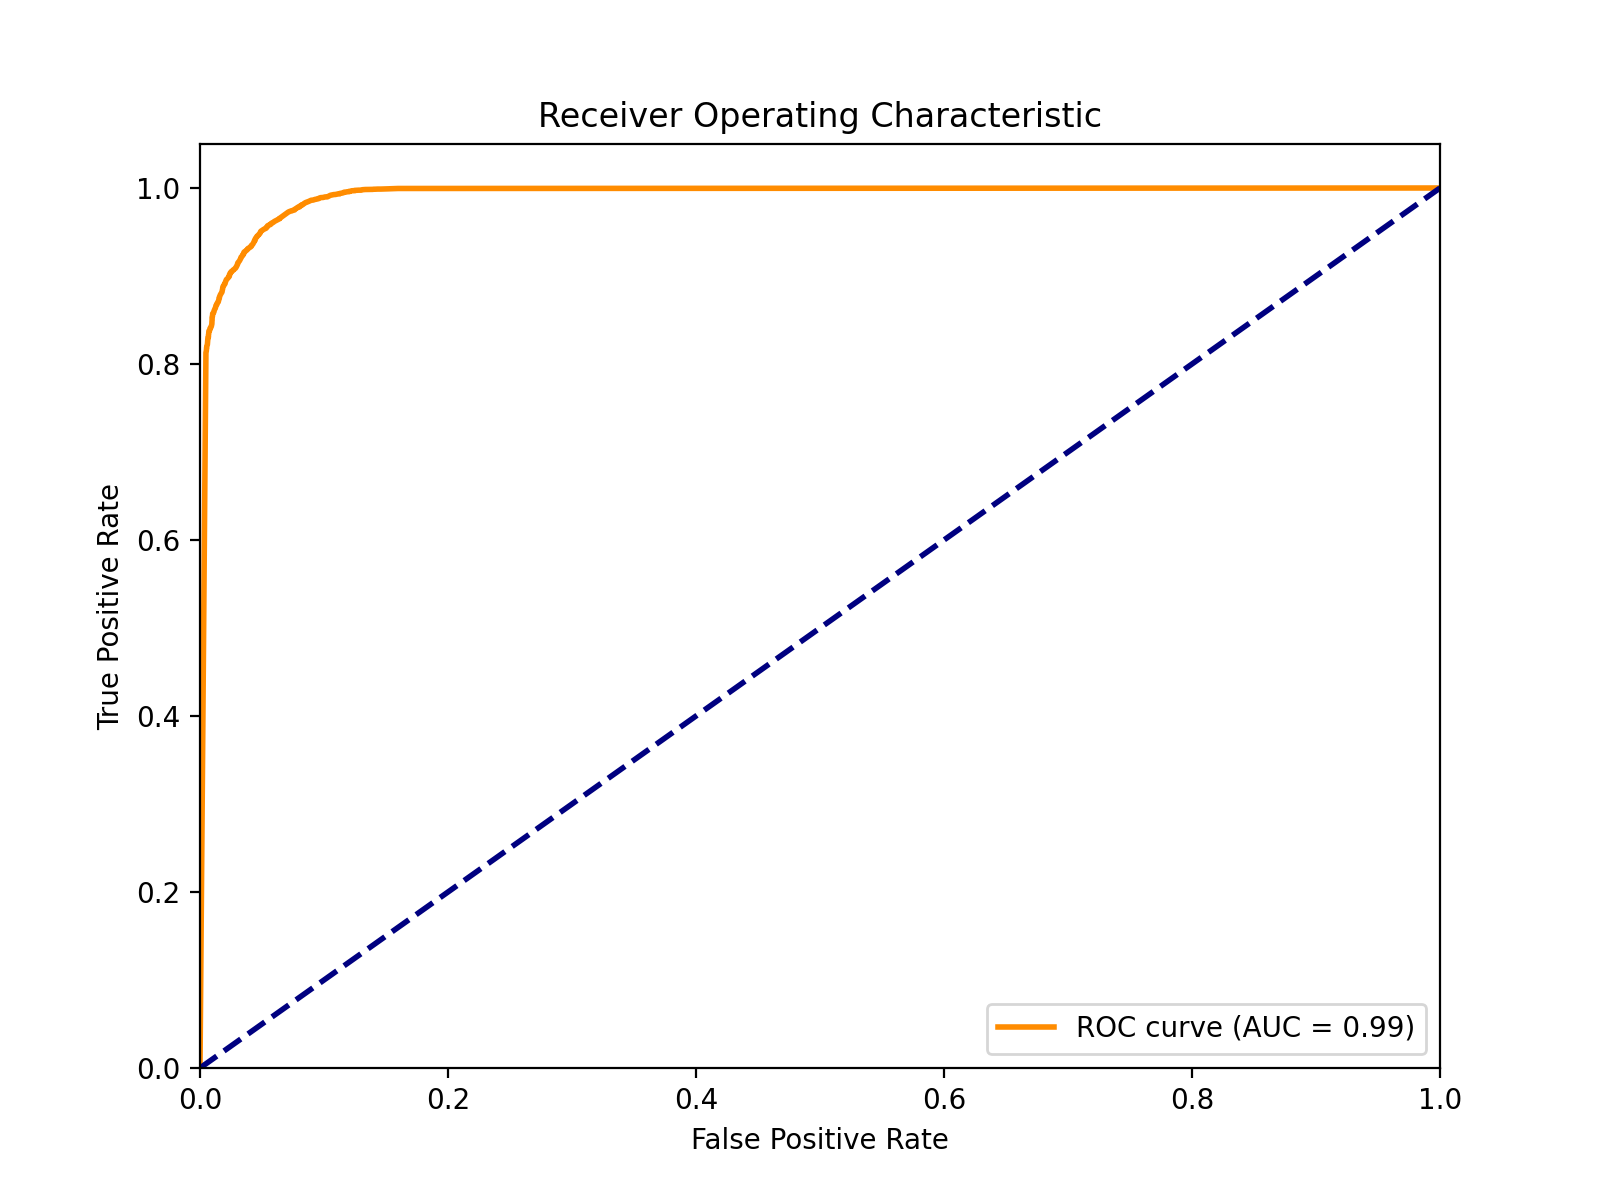

In [ ]:
# Plotando curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

O modelo tem uma taxa extremamente baixa de falsos positivos e falsos negativos, e é altamente preciso na classificação das instâncias. Isso é uma indicação muito positiva de que o modelo é altamente confiável e preciso em sua capacidade de distinguir entre as classes. 

Antes da otimização, o modelo Decision Tree apresentava um F1-score de 0.95 para os clientes satisfeitos (classe 1) e 0.94 para os clientes insatisfeitos (classe 0). Após a otimização, essas métricas permaneceram praticamente inalteradas, com um F1-score de 0.96 para os clientes satisfeitos e 0.94 para os clientes insatisfeitos.

Isso indica que o modelo Decision Tree já estava bem ajustado antes da otimização e não se beneficiou significativamente da calibração dos hiperparâmetros. No entanto, é importante notar que o modelo manteve um desempenho sólido e consistente, mantendo a precisão e a capacidade de prever a satisfação do cliente.

## Hyperparameter Tuning Adaboost


In [ ]:
# Definindo uma grade de hiperparâmetros para otimização do modelo AdaBoost
param_grid_adaboost = {
    'n_estimators': [50, 100, 200],  # Número de estimadores no ensemble AdaBoost
    'learning_rate': [0.01, 0.1, 0.5, 1.0],  # Taxa de aprendizado para ajustar o peso dos estimadores fracos
    'base_estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)]
}


In [ ]:
# Realizando uma pesquisa aleatória (RandomizedSearchCV) para otimizar o modelo AdaBoost
random_search_adaboost = RandomizedSearchCV(AdaBoostClassifier(base_estimator=DecisionTreeClassifier()), param_distributions=param_grid_adaboost, cv=kf, scoring='f1', n_iter=10, n_jobs=-1)
random_search_adaboost.fit(X_train, y_train)

# Melhores hiperparâmetros e score encontrados durante a pesquisa
best_params_adaboost = random_search_adaboost.best_params_
best_score_adaboost = random_search_adaboost.best_score_

In [ ]:
# Criando modelo AdaBoost com os melhores hiperparâmetros do random search
best_adaboost = AdaBoostClassifier(**best_params_adaboost)

# Treinando o modelo AdaBoost
best_adaboost.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   n_estimators=200)

In [ ]:
# Realizando a predição
y_pred = best_adaboost.predict(X_test)

In [ ]:
# Imprimindo as métricas de avaliação
print(f"adaboost_classifier:\n", classification_report(y_test, y_pred))

adaboost:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95     11286
           1       0.95      0.97      0.96     14690

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



In [ ]:
# Imprimindo as métricas de avaliação dos modelos não otimizados
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name}:\n", classification_report(y_test, y_pred))

logistic_regression:
               precision    recall  f1-score   support

           0       0.86      0.83      0.85     11286
           1       0.87      0.90      0.89     14690

    accuracy                           0.87     25976
   macro avg       0.87      0.86      0.87     25976
weighted avg       0.87      0.87      0.87     25976

decision_tree_classifier:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     11286
           1       0.96      0.95      0.95     14690

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976

random_forest_classifier:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96     11286
           1       0.96      0.98      0.97     14690

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     2597

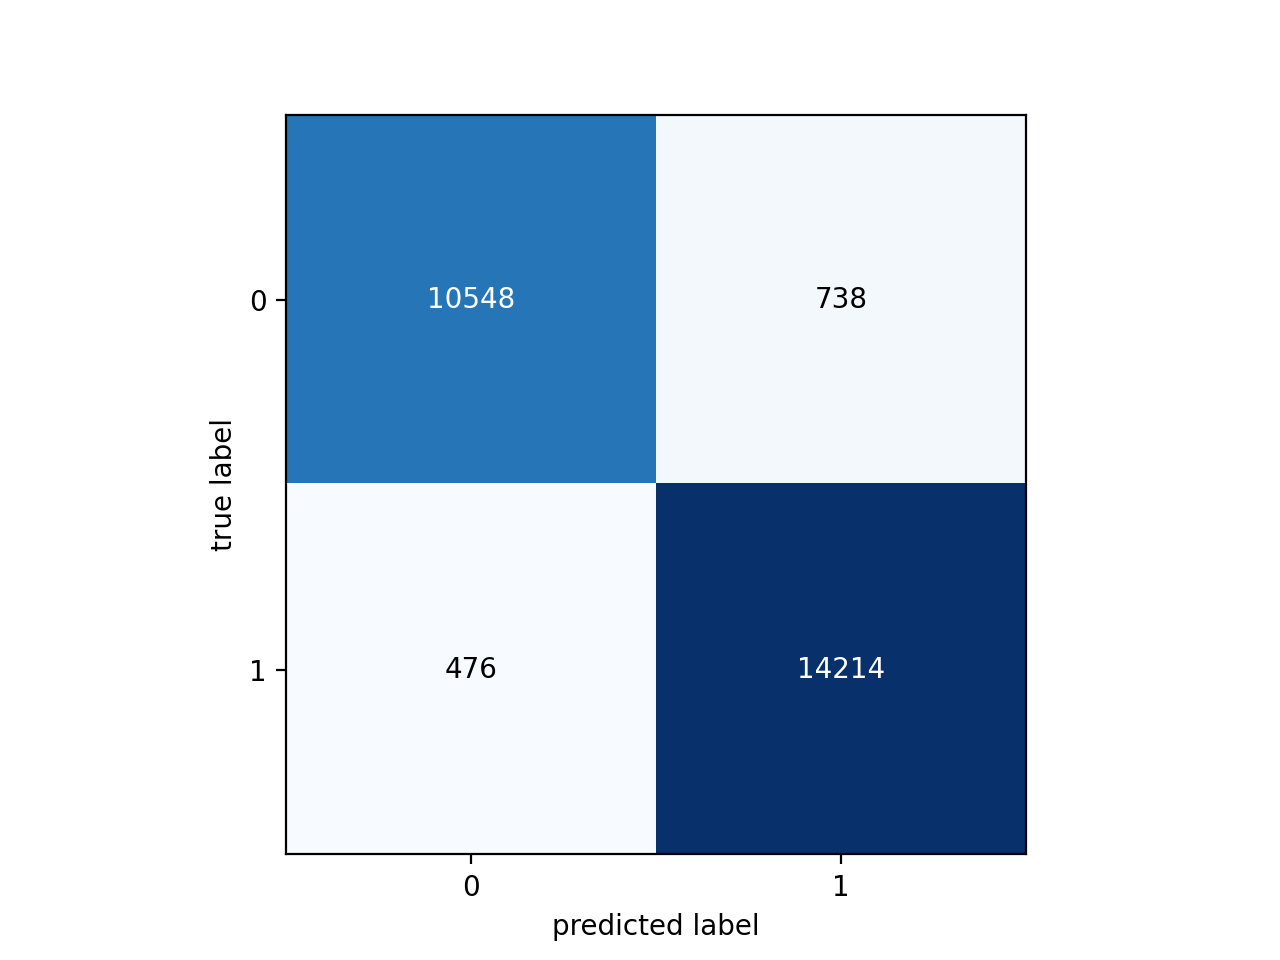

In [ ]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred))
plt.show()

In [ ]:
y_prob = best_adaboost.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

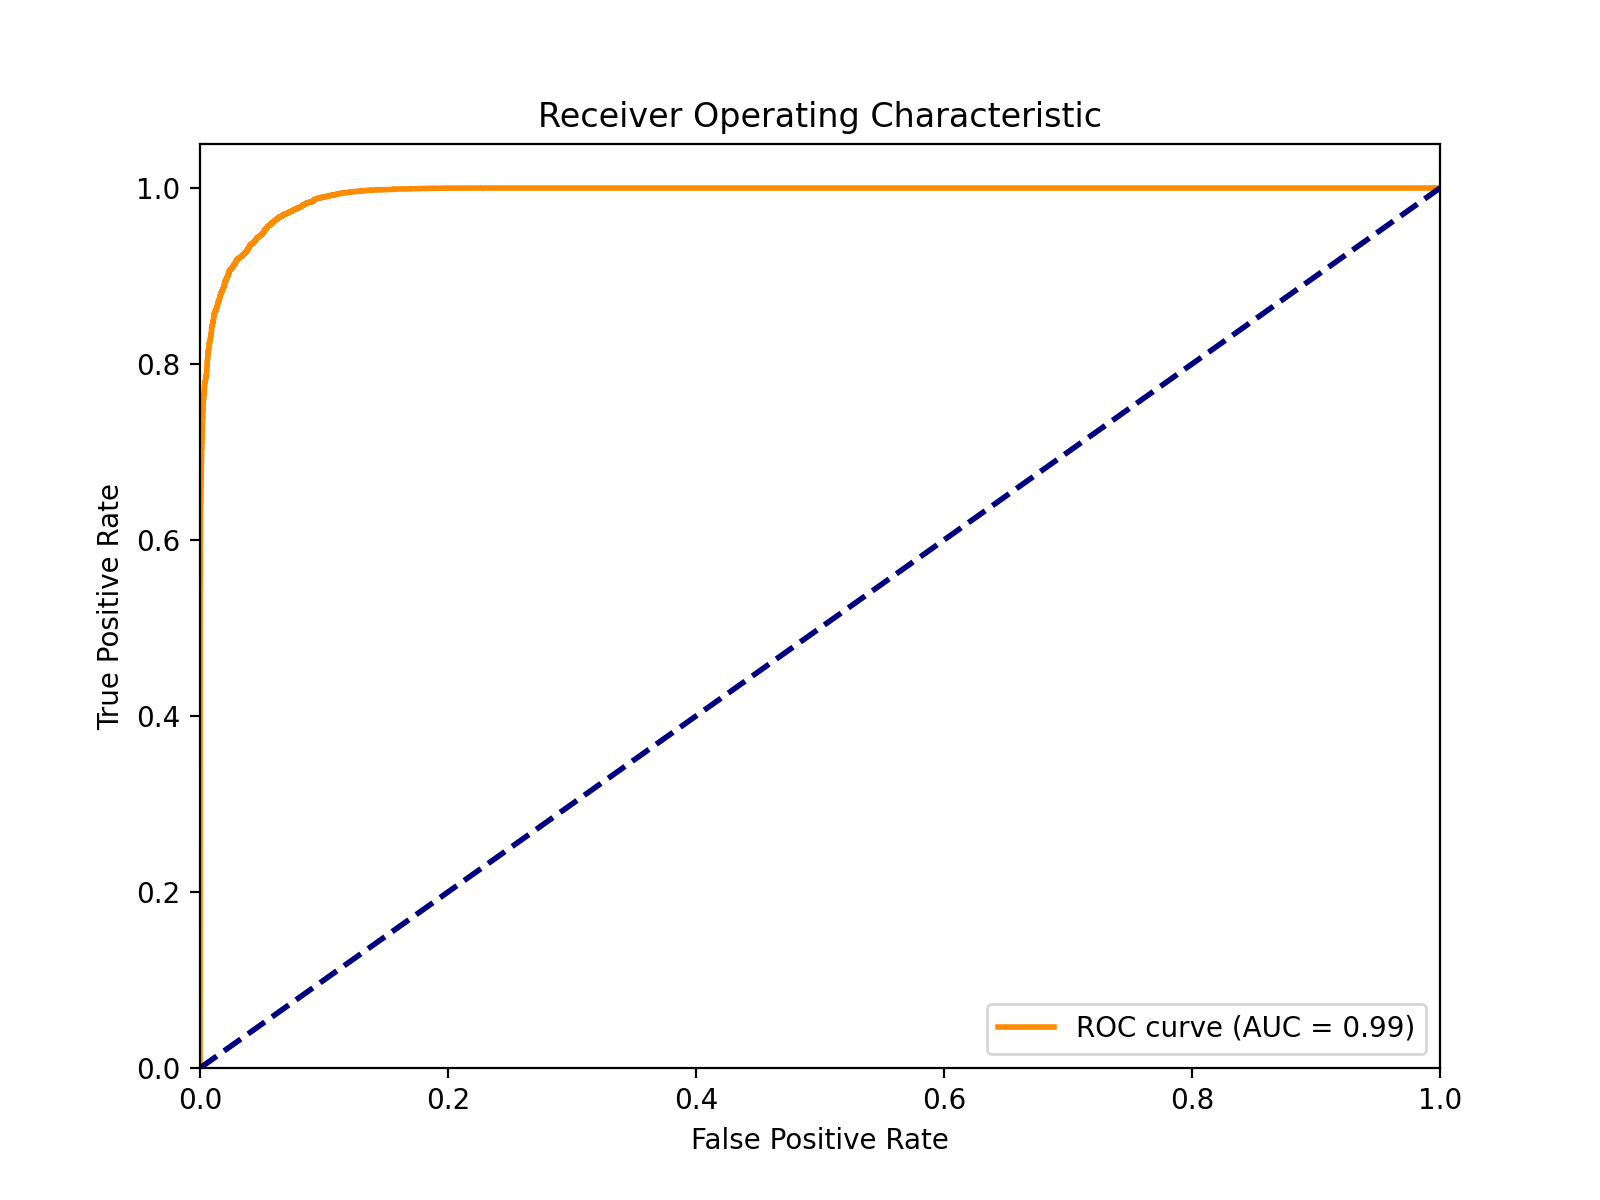

In [ ]:
# Plotando curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Antes da otimização, o modelo Adaboost já apresentava um desempenho sólido, com um F1-score de 0.94 para os clientes satisfeitos (classe 1) e 0.92 para os clientes insatisfeitos (classe 0). No entanto, após a otimização, essas métricas foram aprimoradas, resultando em um F1-score ainda mais alto de 0.96 para os clientes satisfeitos e 0.95 para os clientes insatisfeitos.

Essa melhoria demonstra que a otimização dos hiperparâmetros do modelo Adaboost foi bem-sucedida e permitiu prever com maior precisão a satisfação dos clientes. Isso pode ter um impacto significativo na capacidade da companhia aérea de identificar e abordar proativamente as necessidades de seus passageiros, contribuindo para uma experiência global mais satisfatória.